# Import the libraries and dataset

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import time

import plotly.express as ply
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [7]:
import plotly.io as pio
pio.templates.default = 'plotly_dark'

In [8]:
bank = pd.read_csv('bankruptcy-prevention.csv', sep=';')
bank.head()

industrial_risk   management_risk   financial_flexibility   credibility  \
0              0.5               1.0                     0.0           0.0   
1              0.0               1.0                     0.0           0.0   
2              1.0               0.0                     0.0           0.0   
3              0.5               0.0                     0.0           0.5   
4              1.0               1.0                     0.0           0.0   

    competitiveness   operating_risk       class  
0               0.0              0.5  bankruptcy  
1               0.0              1.0  bankruptcy  
2               0.0              1.0  bankruptcy  
3               0.0              1.0  bankruptcy  
4               0.0              1.0  bankruptcy

# Exploratory data analysis 

So we have import dataset, now let's take a look.

the first is getting infomation about dataset

**We will check the following points for data validation**:
1. NaN values
2. Typing errors
3. Duplicate values
4. Mixed datatype
5. Membership constraint (like blood group can't be D+)
6. Regular expression patterns (like mobile number have 10 digits (in india))
7. Cross field validation (like admission data come before discharge)
8. Empty cell or row or column.

After following the steps given above,it results in clean and uniform dataset.

**Now we can explore and visualize the following things:**
1. Distribution of data.
2. outliers detection and replacement if necessary.
3. Use Boxplot, Density plot, Histogram to get more detail regarding **concentration, distribution,
skewness, outliers, range etc** of data.
4. Check the Correlation between the variables.
5. **Use scatterplot and PCA method** with 'hue' to get insides, regarding the decision boundary in case of **classification problem**.
6. We can use K-mean clustering method to get some more insides for selection of model in classification case.
7. Perform the remaining Univariate, Multi-variate analysis with graphical and non-graphical method.

In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


> Looks like there is a problem in the names of the columns. there is a **space** at starting of the name of columns, so we need to correct it first.

> So there is no null values and the columns data is in same type (float), so there is no chances for having null values in other format like in string or symbolic. (eg, '?', 'don't know' etc)

In [10]:
colm = []
for col in bank.columns:
    print(col)
    col=col.strip()
    colm.append(col)
 
bank.columns = colm
bank.head(2)

industrial_risk
 management_risk
 financial_flexibility
 credibility
 competitiveness
 operating_risk
 class


industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   

   competitiveness  operating_risk       class  
0              0.0             0.5  bankruptcy  
1              0.0             1.0  bankruptcy

In [11]:
bank.rename(columns= {'class': 'target_variable'}, inplace=True)

In [12]:
bank.tail(2)

industrial_risk  management_risk  financial_flexibility  credibility  \
248              1.0              0.0                    0.5          1.0   
249              1.0              0.0                    0.5          0.5   

     competitiveness  operating_risk target_variable  
248              0.5             0.0  non-bankruptcy  
249              1.0             1.0  non-bankruptcy

## Let's check for **NaN values**

In [13]:
bank.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
target_variable          0
dtype: int64

 We already know that, there are zero null values from info and also now from isnull() function

In [14]:
bank['industrial_risk'].value_counts()

1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64

In [15]:
bank['target_variable'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: target_variable, dtype: int64

## Checking for duplicate values

In [16]:
df_bank = bank[bank.duplicated(keep=False)].sort_values(['target_variable', 'industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'operating_risk'])
df_bank.shape

(221, 7)

> In above DataFrame, we are keeping the all duplicate values (**without dropping first one**), so we get the DataFrame with 221 rows

> The following is with **dropping the first occurance.**

In [17]:
df_bank_remove = bank[bank.duplicated()].sort_values(['target_variable', 'industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'operating_risk'])
df_bank_remove.shape

(147, 7)

> The following rows are without having any duplicate values (**unique in DataFrame**)

In [18]:
bank_unique_records = bank.drop_duplicates(keep= False)
print(f'The shape of Unique records are {bank_unique_records.shape}')
bank_unique_records

The shape of Unique records are (29, 7)


industrial_risk  management_risk  financial_flexibility  credibility  \
27               0.0              0.0                    0.0          0.0   
36               1.0              1.0                    0.0          1.0   
72               1.0              0.5                    1.0          0.5   
142              0.0              1.0                    1.0          1.0   
143              1.0              0.0                    1.0          0.5   
144              0.5              1.0                    0.5          1.0   
145              0.5              0.0                    1.0          0.5   
146              0.5              0.5                    0.5          1.0   
147              0.5              0.5                    0.5          0.5   
148              1.0              0.5                    1.0          1.0   
149              0.5              1.0                    1.0          0.5   
150              0.5              0.0                    1.0          0.5   
151              1.0              1.0                    1.0          0.5   
152              1.0              1.0                    1.0          1.0   
153              0.0              0.5                    1.0          1.0   
154              0.5              0.0                    1.0          1.0   
155              0.5              1.0                    0.0          0.5   
156              0.5              0.0                    1.0          0.5   
157              0.0              0.5                    1.0          0.5   
158              0.5              1.0                    0.5          0.5   
159              0.5              1.0                    0.5          0.5   
160              0.5              1.0                    0.5          0.5   
161              0.5              0.5                    0.0          1.0   
171              0.0              1.0                    0.0          1.0   
174              0.0              0.5                    0.0          0.5   
185              0.0              0.5                    0.0          0.5   
190              0.0              0.5                    0.5          0.0   
192              0.5              1.0                    0.0          0.0   
194              0.0              1.0                    0.5          0.0   

     competitiveness  operating_risk target_variable  
27               0.0             1.0      bankruptcy  
36               0.0             0.0      bankruptcy  
72               0.0             0.0      bankruptcy  
142              0.5             1.0  non-bankruptcy  
143              1.0             0.5  non-bankruptcy  
144              1.0             0.5  non-bankruptcy  
145              0.5             0.5  non-bankruptcy  
146              0.5             0.0  non-bankruptcy  
147              1.0             1.0  non-bankruptcy  
148              1.0             1.0  non-bankruptcy  
149              1.0             1.0  non-bankruptcy  
150              1.0             1.0  non-bankruptcy  
151              1.0             0.0  non-bankruptcy  
152              1.0             0.0  non-bankruptcy  
153              1.0             1.0  non-bankruptcy  
154              1.0             1.0  non-bankruptcy  
155              1.0             0.0  non-bankruptcy  
156              1.0             0.0  non-bankruptcy  
157              1.0             1.0  non-bankruptcy  
158              1.0             0.0  non-bankruptcy  
159              1.0             1.0  non-bankruptcy  
160              1.0             0.5  non-bankruptcy  
161              1.0             0.5  non-bankruptcy  
171              1.0             0.5  non-bankruptcy  
174              1.0             1.0  non-bankruptcy  
185              1.0             0.5  non-bankruptcy  
190              1.0             0.0  non-bankruptcy  
192              1.0             0.0  non-bankruptcy  
194              0.5             0.0  non-bankruptcy

> And in above dataframe we removed (keeped as it is) the **First** duplicate values, which gives us 147 rows. Hence these are the rows we can **drop from original dataframe**.

> 🤯🔍 **Careful** The dataframe given below shows us the count of duplicate rows with their respective values.

In [19]:
# This DataFrame is without dropping first occurance 
pd.set_option('display.max_rows', None)
duplicate_without_remove = pd.DataFrame(df_bank.value_counts())
duplicate_without_remove

0
industrial_risk management_risk financial_flexibility credibility competitiveness operating_risk target_variable    
0.0             1.0             0.0                   0.0         0.0             1.0            bankruptcy       11
1.0             1.0             0.0                   0.0         0.0             1.0            bankruptcy       10
                                                                                  0.5            bankruptcy        9
0.5             1.0             0.0                   0.0         0.0             1.0            bankruptcy        8
                0.5             0.0                   0.0         0.0             1.0            bankruptcy        7
                1.0             0.0                   0.0         0.0             0.5            bankruptcy        5
0.0             0.5             0.0                   0.0         0.0             1.0            bankruptcy        5
1.0             1.0             0.0                   0.5         0.0             1.0            bankruptcy        4
0.5             0.0             0.0                   0.5         0.0             1.0            bankruptcy        4
1.0             0.5             0.0                   0.0         0.0             0.0            bankruptcy        4
                1.0             0.0                   0.0         0.0             0.0            bankruptcy        4
0.0             1.0             0.0                   0.0         0.5             0.5            bankruptcy        4
1.0             1.0             0.0                   0.5         0.0             0.5            bankruptcy        4
0.0             0.5             1.0                   0.0         1.0             1.0            non-bankruptcy    4
1.0             1.0             0.0                   0.5         0.0             0.0            bankruptcy        4
0.5             0.0             0.5                   1.0         0.5             0.0            non-bankruptcy    4
1.0             1.0             0.5                   0.0         0.0             1.0            bankruptcy        4
                                                      1.0         0.5             1.0            non-bankruptcy    4
                0.0             0.0                   0.0         0.0             1.0            bankruptcy        4
0.0             0.0             0.5                   1.0         1.0             0.0            non-bankruptcy    4
0.5             0.5             0.5                   1.0         1.0             0.5            non-bankruptcy    4
                0.0             0.0                   1.0         0.5             0.0            non-bankruptcy    4
                0.5             0.0                   1.0         1.0             0.0            non-bankruptcy    3
0.0             1.0             0.0                   0.0         0.0             0.0            bankruptcy        3
1.0             0.0             0.5                   0.5         0.5             1.0            non-bankruptcy    2
                                                                  1.0             1.0            non-bankruptcy    2
                                0.0                   1.0         1.0             0.5            non-bankruptcy    2
0.5             1.0             0.0                   1.0         1.0             0.5            non-bankruptcy    2
1.0             0.0             0.5                   1.0         0.5             0.0            non-bankruptcy    2
0.0             0.0             0.5                   0.5         0.5             0.0            non-bankruptcy    2
1.0             0.0             1.0                   1.0         1.0             1.0            non-bankruptcy    2
                0.5             0.0                   0.0         0.0             1.0            bankruptcy        2
0.5             0.5             1.0                   1.0         0.5             0.5            non-bankruptcy    2
1.0             1.0 

In [20]:
# This DataFrame is with dropping first occurance observation.
duplicate_with_remove = pd.DataFrame(df_bank_remove.value_counts())
duplicate_with_remove

0
industrial_risk management_risk financial_flexibility credibility competitiveness operating_risk target_variable    
0.0             1.0             0.0                   0.0         0.0             1.0            bankruptcy       10
1.0             1.0             0.0                   0.0         0.0             1.0            bankruptcy        9
                                                                                  0.5            bankruptcy        8
0.5             1.0             0.0                   0.0         0.0             1.0            bankruptcy        7
                0.5             0.0                   0.0         0.0             1.0            bankruptcy        6
                1.0             0.0                   0.0         0.0             0.5            bankruptcy        4
0.0             0.5             0.0                   0.0         0.0             1.0            bankruptcy        4
1.0             1.0             0.0                   0.5         0.0             1.0            bankruptcy        3
0.5             0.0             0.0                   0.5         0.0             1.0            bankruptcy        3
1.0             0.5             0.0                   0.0         0.0             0.0            bankruptcy        3
                1.0             0.0                   0.0         0.0             0.0            bankruptcy        3
0.0             1.0             0.0                   0.0         0.5             0.5            bankruptcy        3
1.0             1.0             0.0                   0.5         0.0             0.5            bankruptcy        3
0.0             0.5             1.0                   0.0         1.0             1.0            non-bankruptcy    3
1.0             1.0             0.0                   0.5         0.0             0.0            bankruptcy        3
0.5             0.0             0.5                   1.0         0.5             0.0            non-bankruptcy    3
1.0             1.0             0.5                   0.0         0.0             1.0            bankruptcy        3
                                                      1.0         0.5             1.0            non-bankruptcy    3
                0.0             0.0                   0.0         0.0             1.0            bankruptcy        3
0.0             0.0             0.5                   1.0         1.0             0.0            non-bankruptcy    3
0.5             0.5             0.5                   1.0         1.0             0.5            non-bankruptcy    3
                0.0             0.0                   1.0         0.5             0.0            non-bankruptcy    3
                0.5             0.0                   1.0         1.0             0.0            non-bankruptcy    2
0.0             1.0             0.0                   0.0         0.0             0.0            bankruptcy        2
1.0             0.0             0.5                   0.5         0.5             1.0            non-bankruptcy    1
                                                                  1.0             1.0            non-bankruptcy    1
                                0.0                   1.0         1.0             0.5            non-bankruptcy    1
0.5             1.0             0.0                   1.0         1.0             0.5            non-bankruptcy    1
1.0             0.0             0.5                   1.0         0.5             0.0            non-bankruptcy    1
0.0             0.0             0.5                   0.5         0.5             0.0            non-bankruptcy    1
1.0             0.0             1.0                   1.0         1.0             1.0            non-bankruptcy    1
                0.5             0.0                   0.0         0.0             1.0            bankruptcy        1
0.5             0.5             1.0                   1.0         0.5             0.5            non-bankruptcy    1
1.0             1.0 

In [21]:
duplicate_with_remove[0].sum()

147

> **🙄🙄147 duplicate rows**, let's check them out again.

In [22]:
bank[(bank.industrial_risk ==1) & (bank.management_risk == 1) & 
     (bank.financial_flexibility == 0) & (bank.credibility ==0) & (bank.operating_risk ==0.5)
    & (bank.target_variable == 'bankruptcy')]

industrial_risk  management_risk  financial_flexibility  credibility  \
7               1.0              1.0                    0.0          0.0   
24              1.0              1.0                    0.0          0.0   
41              1.0              1.0                    0.0          0.0   
51              1.0              1.0                    0.0          0.0   
58              1.0              1.0                    0.0          0.0   
64              1.0              1.0                    0.0          0.0   
75              1.0              1.0                    0.0          0.0   
84              1.0              1.0                    0.0          0.0   
99              1.0              1.0                    0.0          0.0   

    competitiveness  operating_risk target_variable  
7               0.0             0.5      bankruptcy  
24              0.0             0.5      bankruptcy  
41              0.0             0.5      bankruptcy  
51              0.0             0.5      bankruptcy  
58              0.0             0.5      bankruptcy  
64              0.0             0.5      bankruptcy  
75              0.0             0.5      bankruptcy  
84              0.0             0.5      bankruptcy  
99              0.0             0.5      bankruptcy

In [23]:
bank[(bank.industrial_risk ==0.5) & (bank.management_risk == 1) & 
     (bank.financial_flexibility == 0) & (bank.credibility ==0) & (bank.operating_risk ==0.5)]

industrial_risk  management_risk  financial_flexibility  credibility  \
0               0.5              1.0                    0.0          0.0   
15              0.5              1.0                    0.0          0.0   
16              0.5              1.0                    0.0          0.0   
50              0.5              1.0                    0.0          0.0   
92              0.5              1.0                    0.0          0.0   

    competitiveness  operating_risk target_variable  
0               0.0             0.5      bankruptcy  
15              0.0             0.5      bankruptcy  
16              0.0             0.5      bankruptcy  
50              0.0             0.5      bankruptcy  
92              0.0             0.5      bankruptcy

**😯😐 there are lots of duplicate row**, This rows will affect the model, so we need to delete them

In [24]:
bank_cleaned = bank.drop_duplicates().reset_index()
bank_cleaned.tail()

index  industrial_risk  management_risk  financial_flexibility  \
98     185              0.0              0.5                    0.0   
99     187              0.0              0.5                    0.5   
100    190              0.0              0.5                    0.5   
101    192              0.5              1.0                    0.0   
102    194              0.0              1.0                    0.5   

     credibility  competitiveness  operating_risk target_variable  
98           0.5              1.0             0.5  non-bankruptcy  
99           0.5              1.0             0.5  non-bankruptcy  
100          0.0              1.0             0.0  non-bankruptcy  
101          0.0              1.0             0.0  non-bankruptcy  
102          0.0              0.5             0.0  non-bankruptcy

In [25]:
bank_cleaned.drop('index', axis = 1, inplace= True)

In [26]:
bank_cleaned.shape

(103, 7)

In [27]:
bank_cleaned.tail()

industrial_risk  management_risk  financial_flexibility  credibility  \
98               0.0              0.5                    0.0          0.5   
99               0.0              0.5                    0.5          0.5   
100              0.0              0.5                    0.5          0.0   
101              0.5              1.0                    0.0          0.0   
102              0.0              1.0                    0.5          0.0   

     competitiveness  operating_risk target_variable  
98               1.0             0.5  non-bankruptcy  
99               1.0             0.5  non-bankruptcy  
100              1.0             0.0  non-bankruptcy  
101              1.0             0.0  non-bankruptcy  
102              0.5             0.0  non-bankruptcy

So now the data is cleaned, we can apply the visualization method.

In [28]:
bank_final = bank.copy()

In [29]:
bank_final.head()

industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk target_variable  
0              0.0             0.5      bankruptcy  
1              0.0             1.0      bankruptcy  
2              0.0             1.0      bankruptcy  
3              0.0             1.0      bankruptcy  
4              0.0             1.0      bankruptcy

## Visualization

Let's start visualization with following plots:
1. Box plot
2. Histogram
3. Countplot
4. Voilin plot
5. Scatterplot or pairplot
6. Density plot
7. Cluster correlation map

<AxesSubplot:>

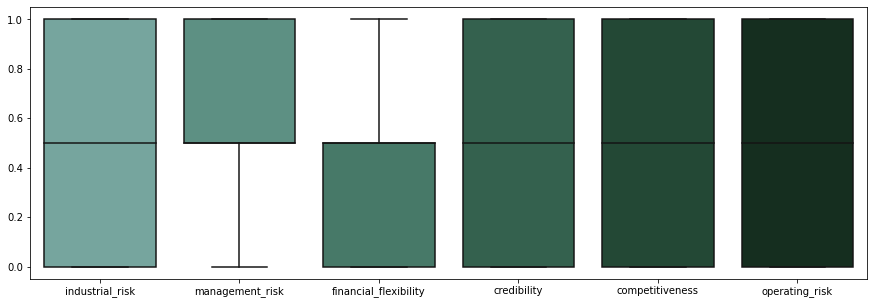

In [30]:
plt.figure(figsize=(15,5))
sn.boxplot(data = bank_final, palette=sn.color_palette("ch:2,r=.2,l=.6"))

In [31]:
ply.box(data_frame=bank_final.iloc[:,0:-1])

In [32]:
def countplots(data):
    plt.subplots(3,2, figsize = (15,25))
    i = 1
    for feature in data.columns:
        plt.subplot(4,2,i)
        sn.countplot(data = data, x = feature, hue='target_variable',)
        i+=1 

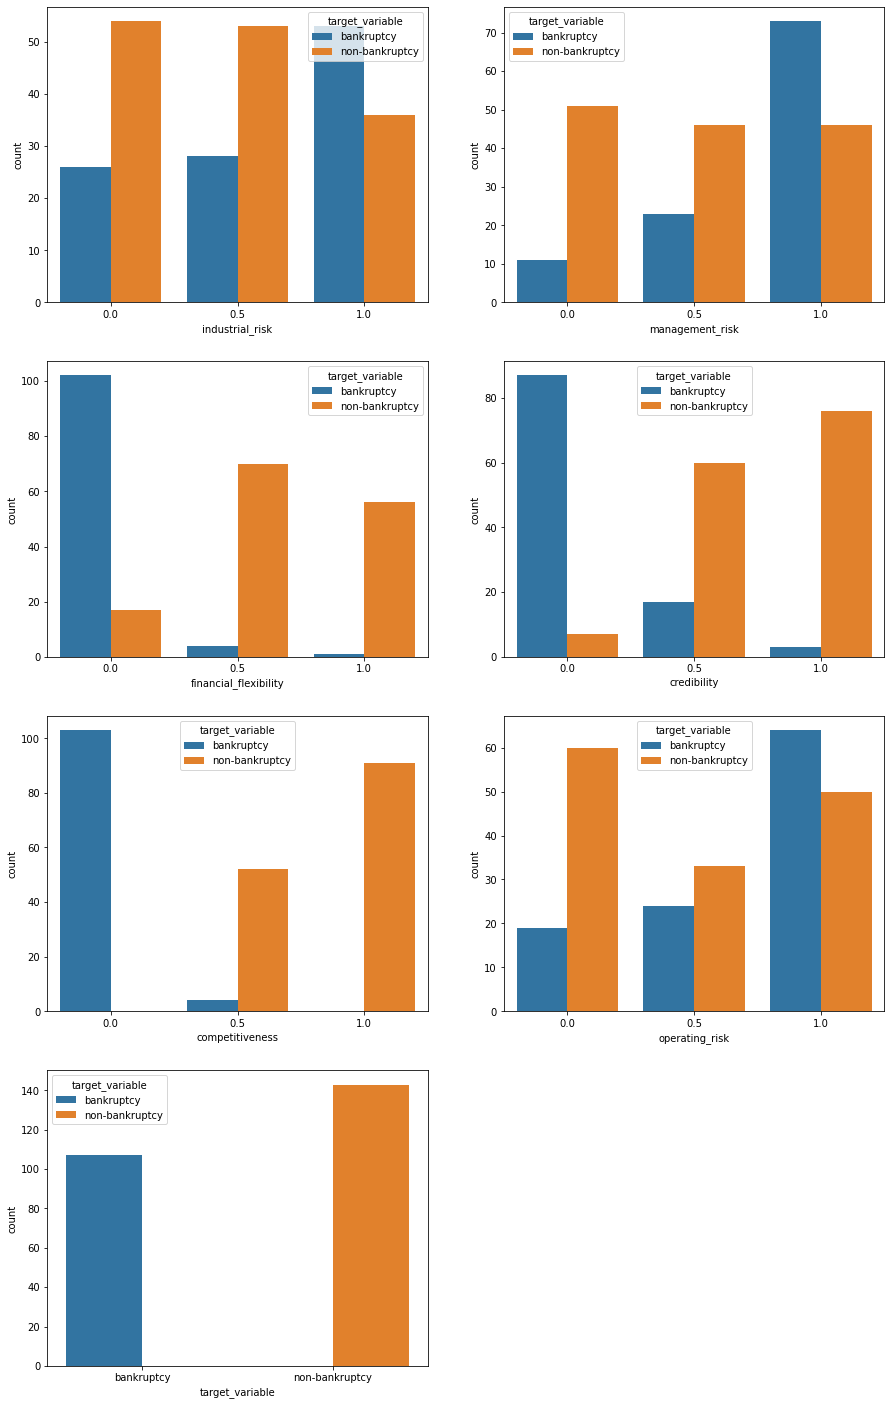

In [33]:
countplots(bank_final)

> 🏹 **Note:** we have unbalanced dataset.

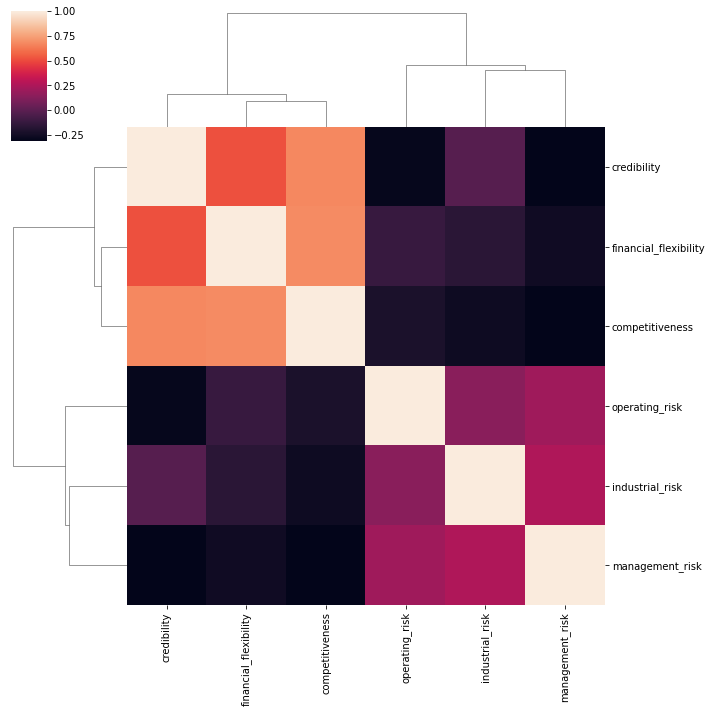

In [34]:
sn.clustermap(bank_final.corr())

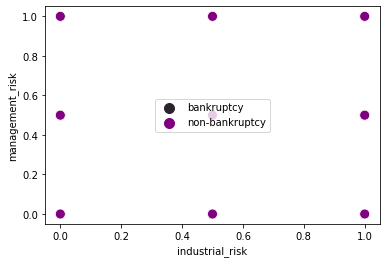

In [35]:
sn.scatterplot(data = bank_final, x = 'industrial_risk', y = 'management_risk', hue = 'target_variable', 
               size= 'target_variable', sizes=[100,100], palette=sn.dark_palette('purple', n_colors=2))
plt.legend(loc = 'center')

<Figure size 1440x3600 with 0 Axes>

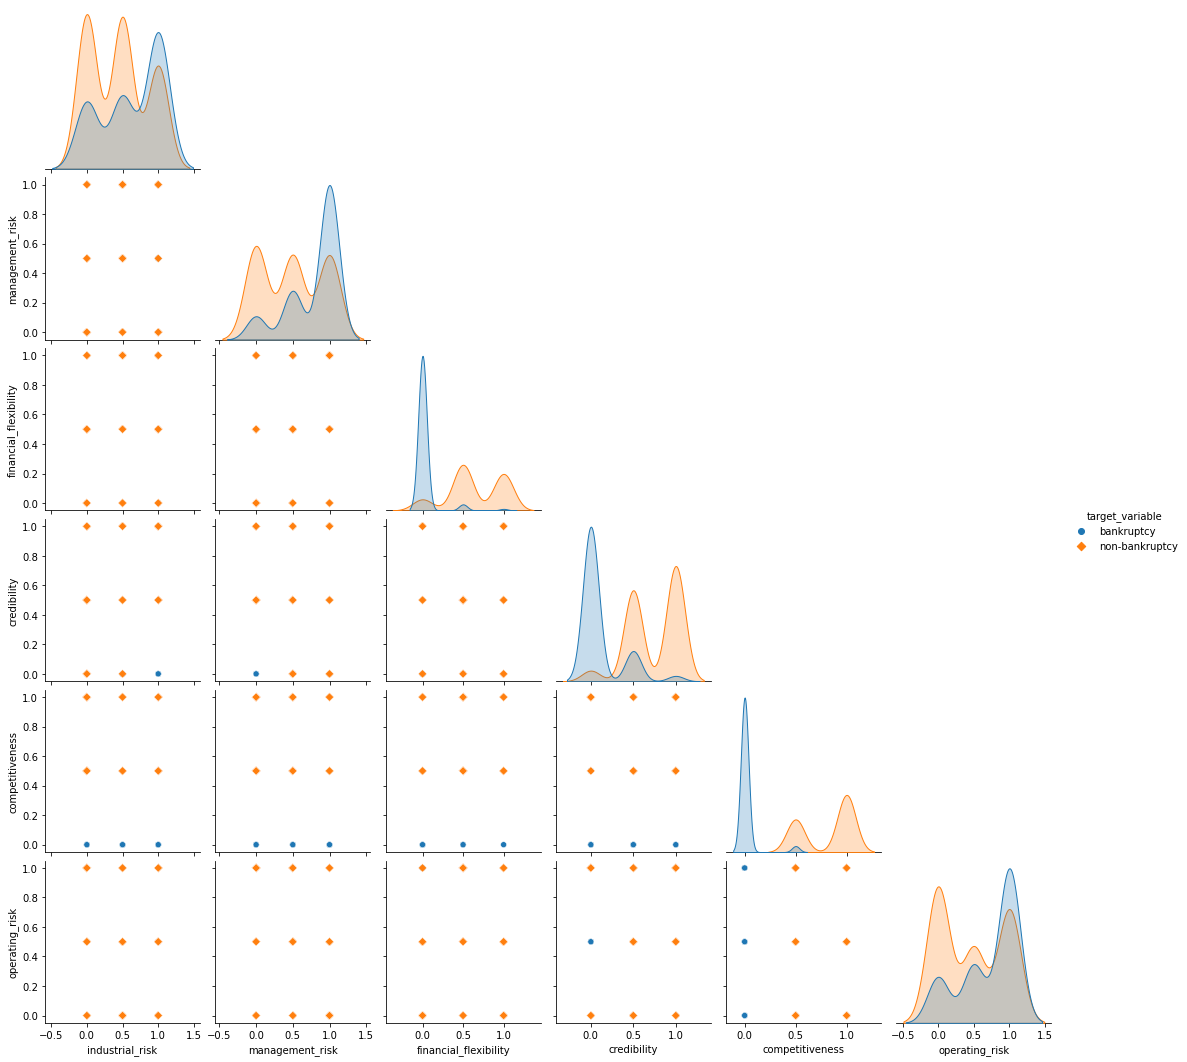

In [36]:
plt.figure(figsize=(20,50))
sn.pairplot(data = bank_final, hue = 'target_variable', markers=['o', 'D'], corner=True)

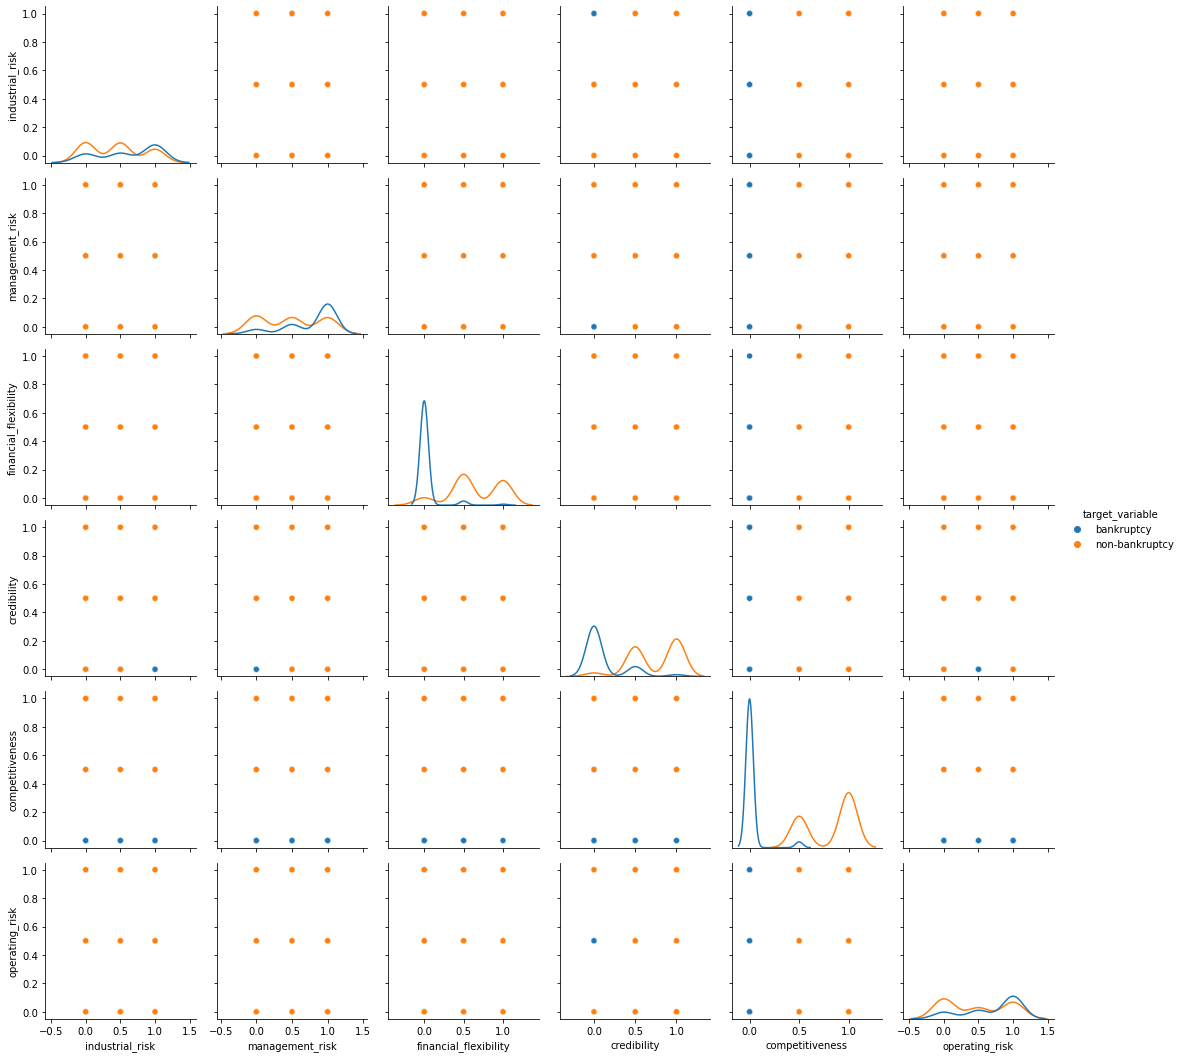

In [37]:
g = sn.PairGrid(data = bank_final, hue='target_variable')
g.map_diag(sn.kdeplot)
g.map_offdiag(sn.scatterplot)
g.add_legend()

> **🏹 NOTE:** If we take a look at the competitiveness, when it is equal to 0 regardless of other features the company going to bankrupt and also 

> **Note that** the competitiveness means the ability of company to compete with other company. if it is zero, hence company can't compete with other so it will go bankrupt

> **fun-fact 😂** if we just take the competitiveness, we can easily predict that the company will be bankrupt or not. we just don't need other variables. 😅


> **Let's take a look at it**

In [38]:
bank_final[bank_final.competitiveness == 0]

industrial_risk  management_risk  financial_flexibility  credibility  \
0                0.5              1.0                    0.0          0.0   
1                0.0              1.0                    0.0          0.0   
2                1.0              0.0                    0.0          0.0   
3                0.5              0.0                    0.0          0.5   
4                1.0              1.0                    0.0          0.0   
5                1.0              1.0                    0.0          0.5   
6                1.0              1.0                    0.0          0.0   
7                1.0              1.0                    0.0          0.0   
8                1.0              1.0                    0.0          0.5   
9                1.0              1.0                    0.0          0.5   
10               1.0              1.0                    0.5          0.0   
11               0.0              1.0                    0.0          0.0   
12               0.5              1.0                    0.0          0.0   
13               1.0              1.0                    0.0          0.0   
15               0.5              1.0                    0.0          0.0   
16               0.5              1.0                    0.0          0.0   
17               0.5              0.5                    0.0          0.0   
18               0.5              1.0                    0.0          0.0   
19               0.0              0.5                    0.0          0.0   
20               0.0              1.0                    0.0          0.0   
21               0.0              0.5                    0.0          0.0   
22               0.0              1.0                    0.0          0.0   
23               1.0              0.5                    0.0          0.0   
24               1.0              1.0                    0.0          0.0   
25               0.5              0.5                    0.0          0.0   
26               0.5              0.5                    0.0          0.0   
27               0.0              0.0                    0.0          0.0   
28               0.5              0.0                    0.0          0.0   
29               0.0              0.5                    0.0          0.0   
30               0.5              1.0                    0.0          0.0   
31               1.0              1.0                    0.0          0.0   
32               1.0              0.5                    0.0          0.0   
33               0.0              1.0                    0.0          0.0   
34               1.0              0.0                    0.0          0.0   
35               0.5              0.0                    0.0          0.5   
36               1.0              1.0                    0.0          1.0   
37               1.0              1.0                    0.0          0.0   
38               1.0              1.0                    0.0          0.5   
39               1.0              1.0                    0.0          1.0   
40               1.0              1.0                    0.0          0.0   
41               1.0              1.0                    0.0          0.0   
42               1.0              1.0                    0.0          0.5   
43               1.0              1.0                    0.0          0.5   
44               1.0              1.0                    0.5          0.0   
45               0.0              1.0                    0.0          0.0   
46               0.5              1.0                    0.0          0.0   
47               1.0              1.0                    0.0          0.0   
50               0.5              1.0                    0.0          0.0   
51               1.0              1.0                    0.0          0.0   
52               1.0              0.0                    0.0          0.0   
53               0.5              0.0                    0.0          0.5   
5

> 🤣🤣🤣😂😂😂 **As expected** there is no need to create model now, right? 😂😁

In [39]:
bank_final[bank_final.target_variable == 'bankruptcy']

industrial_risk  management_risk  financial_flexibility  credibility  \
0                0.5              1.0                    0.0          0.0   
1                0.0              1.0                    0.0          0.0   
2                1.0              0.0                    0.0          0.0   
3                0.5              0.0                    0.0          0.5   
4                1.0              1.0                    0.0          0.0   
5                1.0              1.0                    0.0          0.5   
6                1.0              1.0                    0.0          0.0   
7                1.0              1.0                    0.0          0.0   
8                1.0              1.0                    0.0          0.5   
9                1.0              1.0                    0.0          0.5   
10               1.0              1.0                    0.5          0.0   
11               0.0              1.0                    0.0          0.0   
12               0.5              1.0                    0.0          0.0   
13               1.0              1.0                    0.0          0.0   
14               0.0              1.0                    0.0          0.0   
15               0.5              1.0                    0.0          0.0   
16               0.5              1.0                    0.0          0.0   
17               0.5              0.5                    0.0          0.0   
18               0.5              1.0                    0.0          0.0   
19               0.0              0.5                    0.0          0.0   
20               0.0              1.0                    0.0          0.0   
21               0.0              0.5                    0.0          0.0   
22               0.0              1.0                    0.0          0.0   
23               1.0              0.5                    0.0          0.0   
24               1.0              1.0                    0.0          0.0   
25               0.5              0.5                    0.0          0.0   
26               0.5              0.5                    0.0          0.0   
27               0.0              0.0                    0.0          0.0   
28               0.5              0.0                    0.0          0.0   
29               0.0              0.5                    0.0          0.0   
30               0.5              1.0                    0.0          0.0   
31               1.0              1.0                    0.0          0.0   
32               1.0              0.5                    0.0          0.0   
33               0.0              1.0                    0.0          0.0   
34               1.0              0.0                    0.0          0.0   
35               0.5              0.0                    0.0          0.5   
36               1.0              1.0                    0.0          1.0   
37               1.0              1.0                    0.0          0.0   
38               1.0              1.0                    0.0          0.5   
39               1.0              1.0                    0.0          1.0   
40               1.0              1.0                    0.0          0.0   
41               1.0              1.0                    0.0          0.0   
42               1.0              1.0                    0.0          0.5   
43               1.0              1.0                    0.0          0.5   
44               1.0              1.0                    0.5          0.0   
45               0.0              1.0                    0.0          0.0   
46               0.5              1.0                    0.0          0.0   
47               1.0              1.0                    0.0          0.0   
48               0.0              1.0                    0.0          0.0   
49               0.0              1.0                    0.0          0.0   
50               0.5              1.0                    0.0          0.0   
5

> **💀 CAREFUL** In table we can see that there is a one value where competitiveness is 0.5 but still it is bankrupt. so we need to consider other variables to. But after all the competitiveness is good variable for prediction.

> **Remember** we have 102 observations and in pairplot we get only 9 because the other observations having same values will be overlapped, so we can't see those observation and that leads to wrong interpretation. **Just like Competitiveness**

**Some key observation:**

1. We have categorical variables for features and target variable. so actually looking for outliers doesn't make any sense.
2. Distribution plot will show us the count of various feature variables.
3. The most important result came from the scatter plot or pairplot regarding **Competitiveness**.
4. There are lots of duplicate values.
5. Mathematically the **largest possible size of data will be 1458 unique rows**

## Encoding categorical variables

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
bank_cleaned['target_variable'].unique()

array(['bankruptcy', 'non-bankruptcy'], dtype=object)

In [42]:
def encode_manually(data):
    for feature in data.columns:
        if data[feature].dtype == object:
            print(f'Encoding {feature}:')
            variables = list(data[feature].unique())
            encode_number = range(len(variables))
            encodings_dict = dict(zip(variables, encode_number))
            print(encodings_dict)
            data[feature]=data[feature].map(encodings_dict)
            return encodings_dict

In [43]:
encode_manually(bank_final)

Encoding target_variable:
{'bankruptcy': 0, 'non-bankruptcy': 1}


{'bankruptcy': 0, 'non-bankruptcy': 1}

In [44]:
bank_final.head()

industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk  target_variable  
0              0.0             0.5                0  
1              0.0             1.0                0  
2              0.0             1.0                0  
3              0.0             1.0                0  
4              0.0             1.0                0

In [45]:
bank_final.tail()

industrial_risk  management_risk  financial_flexibility  credibility  \
245              0.0              1.0                    1.0          1.0   
246              1.0              1.0                    0.5          1.0   
247              0.0              1.0                    1.0          0.5   
248              1.0              0.0                    0.5          1.0   
249              1.0              0.0                    0.5          0.5   

     competitiveness  operating_risk  target_variable  
245              1.0             1.0                1  
246              1.0             0.0                1  
247              0.5             0.0                1  
248              0.5             0.0                1  
249              1.0             1.0                1

<AxesSubplot:>

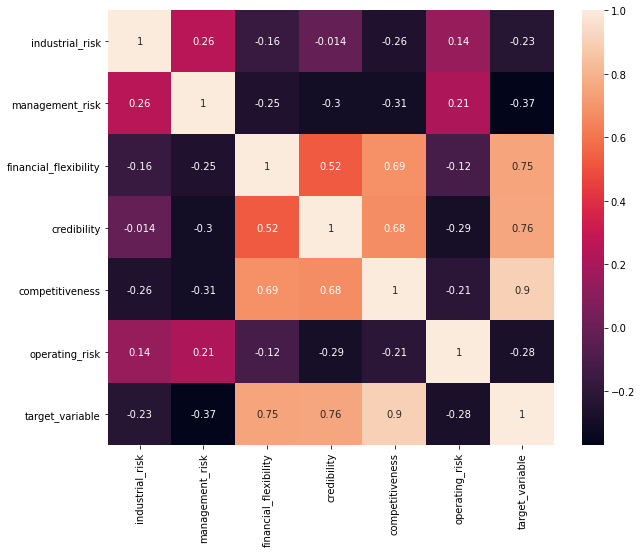

In [46]:
plt.figure(figsize=(10,8))
sn.heatmap(bank_final.corr(), annot=True)

So we get the following observation from correlation heatmap
1. The competitiveness have strong correlation with target variable as observed from scatter plot
2. The credibility, competitiveness and target_variable also have good correlation with each other

## Balancing dataset 

<AxesSubplot:ylabel='target_variable'>

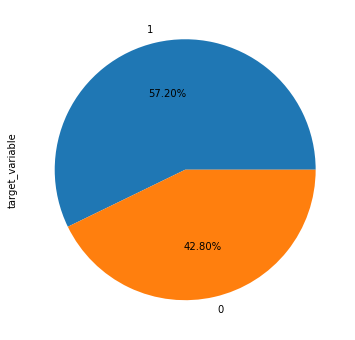

In [47]:
plt.figure(figsize= (6,6))
bank_final['target_variable'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

> So we need to balance the dataset lets try **oversampling and undersampling**

In [48]:
bank_final['target_variable'].value_counts()

1    143
0    107
Name: target_variable, dtype: int64

In [49]:
X, y = bank_final.iloc[:,:-1], bank_final.iloc[:,-1]

Here we split the data into X, y so we can apply the balancing methods 

### Under Sampling (Random under sampler) for balancing the dataset

In [50]:
under_sampling = RandomUnderSampler()
X_under, y_under = under_sampling.fit_resample(X, y)

In [51]:
X_under.shape, y_under.shape, y_under.value_counts()

((214, 6),
 (214,),
 0    107
 1    107
 Name: target_variable, dtype: int64)

In [52]:
type(y_under)

pandas.core.series.Series

> **💀NOTE:🏹** The *value_count()* method is corret in upper cell, because y_under is **panda.Series not numpy array** and there is no value_counts() for numpy array. but still by procedure the y_under should be numpy array. 
so we are using np.unique(), with return_counts = True.

In [53]:
np.unique(y_under, return_counts=True)

(array([0, 1], dtype=int64), array([107, 107], dtype=int64))

<AxesSubplot:xlabel='target_variable', ylabel='count'>

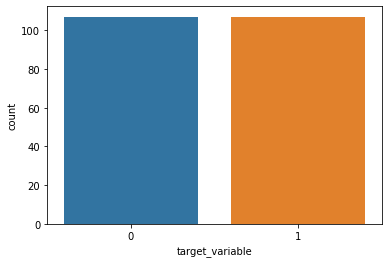

In [54]:
sn.countplot(x = y_under)

> So now we have 25-25 observations for each category of target variable. Hence it is balanced.

In [55]:
bank_undersampled = pd.DataFrame(data = X_under)
bank_undersampled.insert(6, column='target_variable', value= y_under)

In [56]:
bank_undersampled.head()

industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk  target_variable  
0              0.0             0.5                0  
1              0.0             1.0                0  
2              0.0             1.0                0  
3              0.0             1.0                0  
4              0.0             1.0                0

### Oversampling (SMOTE method) for balancing the dataset

In [57]:
smote = SMOTE()
X_over, y_over = smote.fit_resample(X, y)

In [58]:
y_over.value_counts()

0    143
1    143
Name: target_variable, dtype: int64

<AxesSubplot:xlabel='target_variable', ylabel='count'>

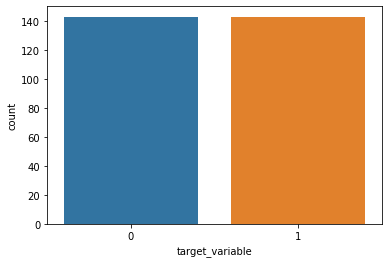

In [59]:
sn.countplot(x = y_over)

> So Here also the dataset is balance and we have 78-78 obs for each categories.

In [60]:
bank_oversampled = pd.DataFrame(data = X_over)
bank_oversampled['target_variable'] = y_over

bank_oversampled.head()

industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk  target_variable  
0              0.0             0.5                0  
1              0.0             1.0                0  
2              0.0             1.0                0  
3              0.0             1.0                0  
4              0.0             1.0                0

In [61]:
bank_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        286 non-null    float64
 1   management_risk        286 non-null    float64
 2   financial_flexibility  286 non-null    float64
 3   credibility            286 non-null    float64
 4   competitiveness        286 non-null    float64
 5   operating_risk         286 non-null    float64
 6   target_variable        286 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 15.8 KB


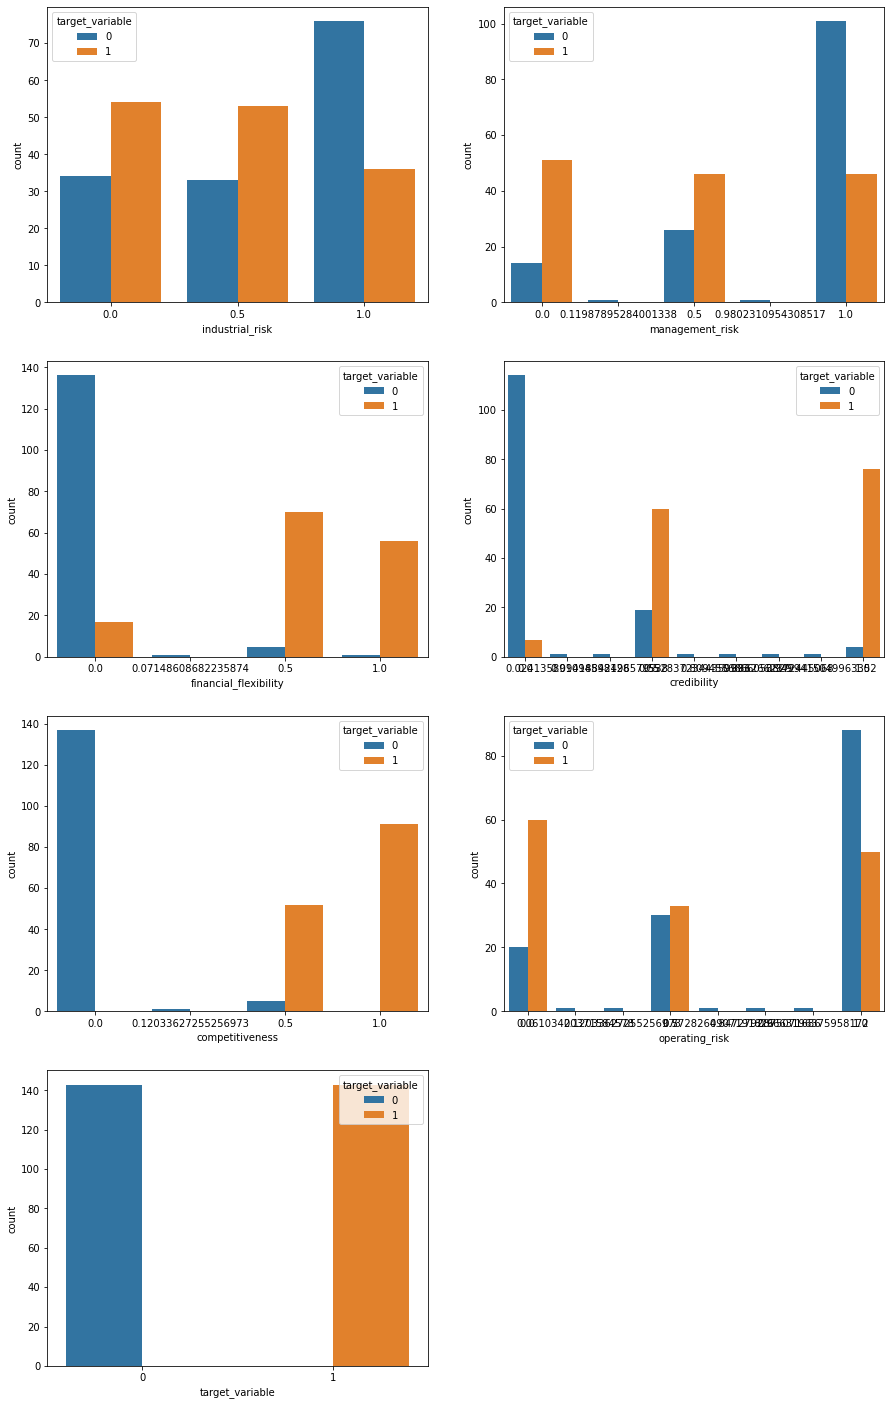

In [62]:
countplots(bank_oversampled)

> **What!!** The SMOTE() method did it's job afterall 🤣😂😂😂🤣

### Oversampling ( RandomOverSampler() ) for balancing the dataset

In [63]:
oversampler = RandomOverSampler()
X_over, y_over = oversampler.fit_resample(X, y)

In [64]:
y_over.value_counts()

0    143
1    143
Name: target_variable, dtype: int64

<AxesSubplot:xlabel='target_variable', ylabel='count'>

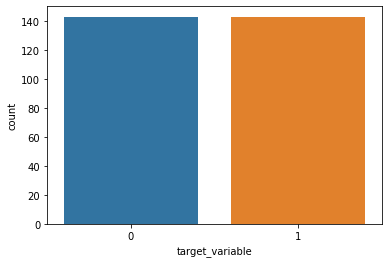

In [65]:
sn.countplot(x = y_over)

In [66]:
bank_oversampled = pd.DataFrame(data = X_over)
bank_oversampled['target_variable'] = y_over

bank_oversampled.head()

industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk  target_variable  
0              0.0             0.5                0  
1              0.0             1.0                0  
2              0.0             1.0                0  
3              0.0             1.0                0  
4              0.0             1.0                0

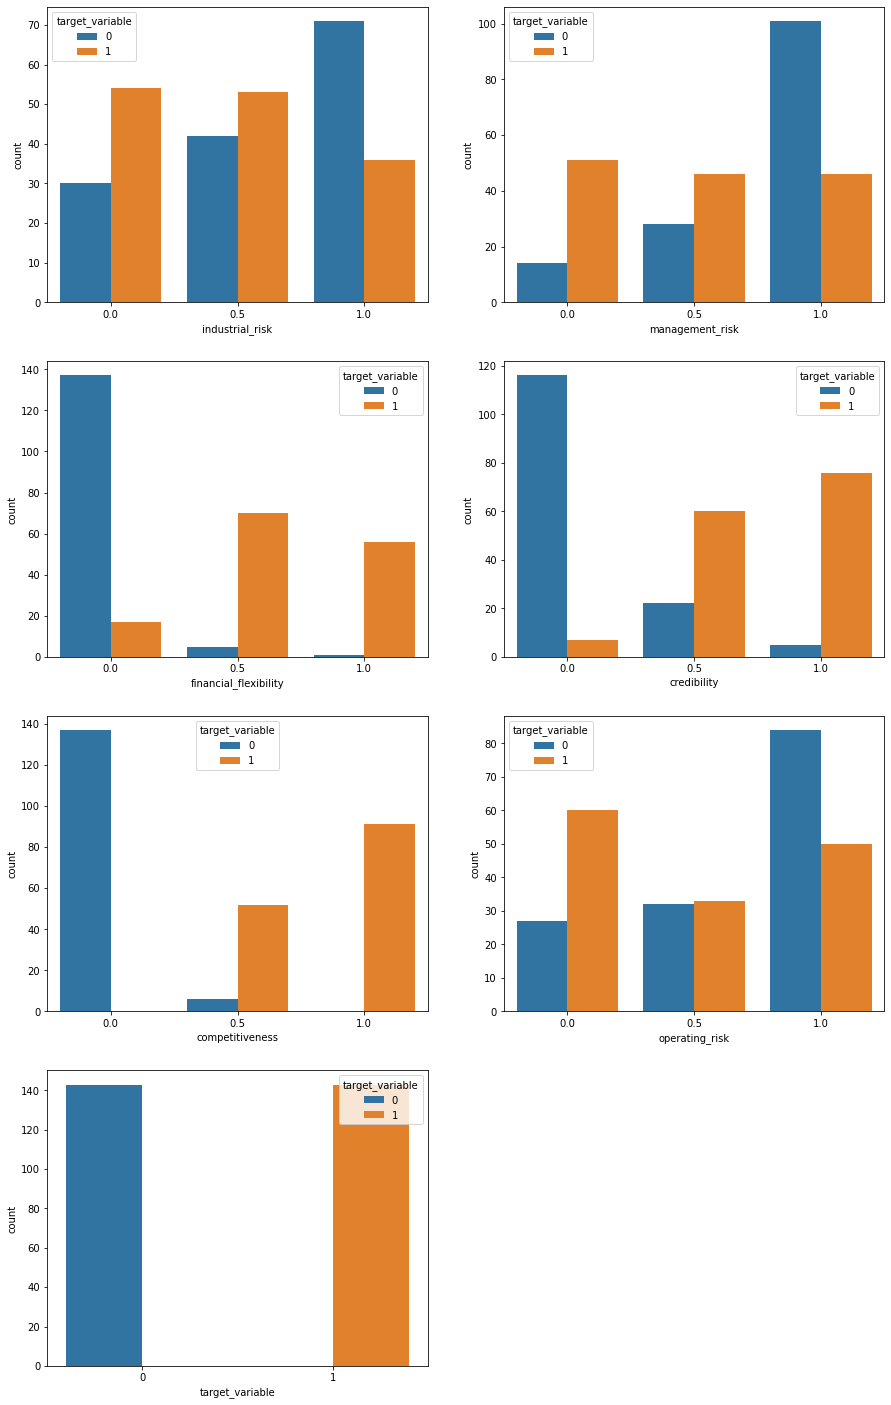

In [67]:
countplots(bank_oversampled)


---

🏹**NOTE:** The countplot tells us lots of stories related to dataset. **Each and every feature values behave according to expected and observed.**

---

In [68]:
bank_oversampled[bank_oversampled.duplicated()].head() # only showing head because there are lots of duplicate values

industrial_risk  management_risk  financial_flexibility  credibility  \
11              0.0              1.0                    0.0          0.0   
13              1.0              1.0                    0.0          0.0   
15              0.5              1.0                    0.0          0.0   
16              0.5              1.0                    0.0          0.0   
18              0.5              1.0                    0.0          0.0   

    competitiveness  operating_risk  target_variable  
11              0.0             1.0                0  
13              0.0             1.0                0  
15              0.0             0.5                0  
16              0.0             0.5                0  
18              0.0             1.0                0

In [69]:
bank_final_1 = bank_oversampled.copy()

## Conclusion from EDA:

So we performed variour EDA methods and try to get as much as possible from the dataset. 

- There was a serious problem with duplicate values but we removed them.

- The dataset was unbalance so we choose the **Oversampling**.
- The **bank_final** dataset will be used for model building.

- '0' is used for Bankrupt and '1' is for non-bankrupt

- **colm** Include the name of features

In [70]:
colm

['industrial_risk',
 'management_risk',
 'financial_flexibility',
 'credibility',
 'competitiveness',
 'operating_risk',
 'class']

In [71]:
bank_1 = bank.astype('category')

# Creating sample dataset 

In [72]:
dataset = []
values = [0 ,0.5 ,1]
for a in values:
    for b in values:
        for c in values:
            for d in values:
                for e in values:
                    for f in values:
                        combinations_1 = [a,b,c,d,e,f]
#                         print(combinations_1)
                        dataset.append(combinations_1)

In [73]:
created_dataset = pd.DataFrame(dataset, columns= colm[:6])

In [74]:
created_dataset.head()

industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.0              0.0                    0.0          0.0   
1              0.0              0.0                    0.0          0.0   
2              0.0              0.0                    0.0          0.0   
3              0.0              0.0                    0.0          0.0   
4              0.0              0.0                    0.0          0.0   

   competitiveness  operating_risk  
0              0.0             0.0  
1              0.0             0.5  
2              0.0             1.0  
3              0.5             0.0  
4              0.5             0.5

# Model Selection

We have task of classification (prediction of bankruptcy).

We completed the EDA and Feature engineering on the dataset and now we can split and select the model for our job.

There are many classification models like:
1. Logistic regression
2. Decision tree.
3. Random Forest classifier.
4. ExtraRandom Forest classifier.
5. Gradient Boosting.
6. XGBoost
7. LGBoost.
8. CatBoost.
9. AdaBoost.
10. KNN
11. Naive Bayes models.
12. Support vector machine classifier.
13. Neural Network.

### Confusion metrics function

In [75]:
def plot_confusion_metric(model, X, y):
    a = ConfusionMatrixDisplay(confusion_matrix(y, model.predict(X)), 
                display_labels= ['Bankrupt', 'Non-bankrupt'],)
    return a.plot(cmap = 'Blues')

###  Pickle path and name function

In [76]:
import pickle

In [77]:
PATH_MODEL = 'H:/Excelr/Project/Bankruptcy project/Model_files/'

In [78]:
def save_model_function(model,name_of_model, PATH = PATH_MODEL):
    """
    This function is used to save the model created by tensorflow and sklearn.
    It returns the path, where model is saved
    """
    
    
    if 'keras' in str(model):
        path_name = PATH+str(name_of_model)+ time.strftime('-%d-%b-%Y-%H_%M_%S')
        print('Tensorflow file')
        path_name_tensor = path_name + '.h5'
        model.save(path_name_tensor)
        print('The model is saved as:', path_name_tensor)
        return path_name_tensor
    else:
        print('Sklearn model')
        path_name = PATH+str(name_of_model)+ time.strftime('-%d-%b-%Y-%H_%M_%S')
        path_name_sklearn = path_name+'.pkl'
        pickle.dump(model, open(path_name_sklearn, 'wb'))
        print('The model is saved as:', path_name_sklearn)
        return path_name_sklearn
        
def load_pickel_model(path_of_model):
    """
    This function loads the models from dir given by save_model_function
    Only works on pickle file hence sklearn
    """
    model = pickle.load(open(path_of_model, 'rb'))
    return model

### Splitting into training and testing

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(bank_final.iloc[:,:-1], 
                            bank_final.iloc[:,-1], random_state= 3, 
                            test_size=0.2)

In [81]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(bank_final_1.iloc[:,:-1], 
                            bank_final_1.iloc[:,-1], random_state= 4, 
                            test_size=0.2)

In [82]:
X_train.shape, X_test.shape

((200, 6), (50, 6))

In [83]:
X_train_1.shape, X_test_1.shape

((228, 6), (58, 6))

In [84]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(
        bank_1.iloc[:,:-1], bank_1.iloc[:,-1], random_state= 3)

## Neural Network 

We are using TensorFlow library, so we can create the neural network

In [85]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import datetime

In [86]:
import tensorflow as tf

In [87]:
tf.random.set_seed(4)

In [88]:
# %load_ext tensorboard

### Neural Model 1 

In [89]:
tf.random.set_seed(4)

neural_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, ),   #kernel_regularizer = tf.keras.regularizers.L2(15)
#     tf.keras.layers.Dropout(0.2, ),
    tf.keras.layers.Dense(1,name = 'Output', activation = 'sigmoid')
], name = 'neural_model_1', )


neural_model_1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.1),
                     loss = tf.keras.losses.BinaryCrossentropy(),
                     metrics = ['accuracy'])

# log_dir_1 = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_1, histogram_freq=1, )


history_neural_1 = neural_model_1.fit(X_train, y_train, epochs= 30, 
                                    )  #callbacks=[tensorboard_callback]
print('Model Traning complete')

Epoch 1/30
7/7 [==============================] - 3s 11ms/step - loss: 0.4870 - accuracy: 0.7100
Epoch 2/30
7/7 [==============================] - 0s 1ms/step - loss: 0.1076 - accuracy: 0.9650
Epoch 3/30
7/7 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.9900
Epoch 4/30
7/7 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9950
Epoch 5/30
7/7 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9900
Epoch 6/30
7/7 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.9950
Epoch 7/30
7/7 [==============================] - 0s 1ms/step - loss: 0.0268 - accuracy: 0.9950
Epoch 8/30
7/7 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.9900
Epoch 9/30
7/7 [==============================] - 0s 1ms/step - loss: 0.0297 - accuracy: 0.9950
Epoch 10/30
7/7 [==============================] - 0s 1ms/step - loss: 0.0167 - accuracy: 0.9900
Epoch 11/30
7/7 [=====================

In [90]:
neural_model_1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 8.3520e-04 - accuracy: 1.0000


[0.0008352004806511104, 1.0]

In [91]:
neural_model_1.summary()

Model: "neural_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 56        
_________________________________________________________________
Output (Dense)               (None, 1)                 9         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


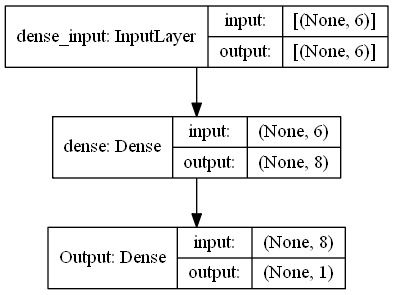

In [92]:
tf.keras.utils.plot_model(neural_model_1, show_shapes=True, 
                          show_layer_names=True, )

In [93]:
history_dict_neural_1 =history_neural_1.history

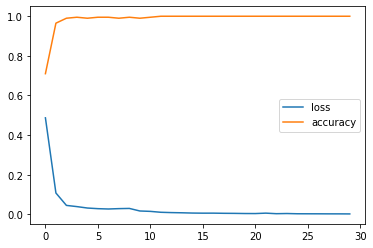

In [94]:
plt.plot(history_dict_neural_1['loss'], label = 'loss',)
plt.plot(history_dict_neural_1['accuracy'], label = 'accuracy')
plt.legend()

In [95]:
y_pred_neural_1 = tf.round(neural_model_1.predict(X_test))

In [96]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [97]:
confusion_matrix(y_test, y_pred_neural_1,)

array([[25,  0],
       [ 0, 25]], dtype=int64)

In [98]:
print(classification_report(y_test, y_pred_neural_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Text(0.5, 1.0, 'Confusion Metrics')

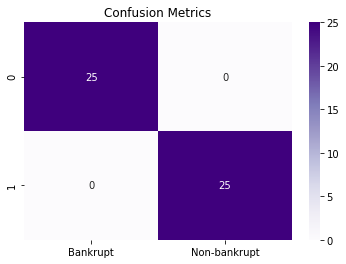

In [99]:
sn.heatmap(confusion_matrix(y_test, y_pred_neural_1), annot=True,
           xticklabels=['Bankrupt', 'Non-bankrupt'], cmap=plt.cm.Purples)
plt.title("Confusion Metrics")

In [100]:
neural_model_1.layers

In [103]:
neural_model_1.weights[0]

<tf.Variable 'dense/kernel:0' shape=(6, 8) dtype=float32, numpy=
array([[ 0.29105702, -0.7397094 , -0.17343624, -0.5786596 , -0.79158735,
         0.30277878,  0.626988  , -0.77301466],
       [-0.53897977, -0.05875114,  0.17114882, -0.32469302, -0.9198608 ,
         0.27352166,  0.27314556, -0.6878928 ],
       [ 0.7569602 ,  1.2191646 , -0.65299684,  0.5527003 ,  1.673263  ,
        -1.0703665 , -0.48537433,  1.4180161 ],
       [ 0.5384503 ,  0.76754963, -1.2100983 ,  0.7941716 ,  1.5688137 ,
        -1.3303951 , -1.007775  ,  0.34968698],
       [ 1.1198435 ,  3.2060363 , -1.1534821 ,  0.68919003,  2.762704  ,
        -4.5065126 , -0.5891769 ,  1.6597325 ],
       [ 0.21733399,  0.6098097 ,  0.22167549, -0.34210774, -0.09050395,
        -0.20848723,  0.4860691 , -0.02831371]], dtype=float32)>

In [104]:
weights_1_model_1 = np.array((neural_model_1.weights[0]))
weights_from_1st_layer = pd.DataFrame(weights_1_model_1)

In [106]:
weights_from_1st_layer

0         1         2         3         4         5         6  \
0  0.291057 -0.739709 -0.173436 -0.578660 -0.791587  0.302779  0.626988   
1 -0.538980 -0.058751  0.171149 -0.324693 -0.919861  0.273522  0.273146   
2  0.756960  1.219165 -0.652997  0.552700  1.673263 -1.070367 -0.485374   
3  0.538450  0.767550 -1.210098  0.794172  1.568814 -1.330395 -1.007775   
4  1.119843  3.206036 -1.153482  0.689190  2.762704 -4.506513 -0.589177   
5  0.217334  0.609810  0.221675 -0.342108 -0.090504 -0.208487  0.486069   

          7  
0 -0.773015  
1 -0.687893  
2  1.418016  
3  0.349687  
4  1.659732  
5 -0.028314

### Regularization parameter

The Model giving training and testing accuracy 100%. but this means that the model may be overfitted. So we need to regularize the model there are various methods of regularization of neural network:
1. **Adding regularizer** Lasso or Ridge regularizer using ***tf.keras.regularizers.L1()*** or L2 or L1L2 and also we can use shortcut just define 'l1' or 'l2'.

2. **Defining Dropout**. it randomly select some nodes and removes them along training. we can define them using ***tf.keras.layers.Dropout(rate, etc)***. The rate defines the dropping probability.

3. **Data Augmentation:** The simplest way to reduce overfitting is to increase the size of dataset. but yes it is costly but we can perform some data augmentation like in case of image rotate the images, shear them, shift them scale them etc. we can use **ImageDataGenerator()** from tf.keras.preprocessing.image.

4. **Early Stopping**: We can stop the model before completing its training (arriving at overfitting). we use this from **tf.keras.callbacks.EarlyStopping()**.

### Neural network 2 

In [107]:
tf.random.set_seed(4)

neural_model_2 = Sequential()


neural_model_2.add(tf.keras.layers.Dense(6, input_shape=(6,), 
                activation = 'relu', 
                kernel_regularizer = tf.keras.regularizers.L1(0.01)))


neural_model_2.add(Dense(1, activation = 'sigmoid'))

In [108]:
neural_model_2.compile(optimizer=Adam(learning_rate=0.001), 
                loss = tf.keras.losses.BinaryCrossentropy(),
                      metrics= ['accuracy'])

In [109]:
history_neural_2 = neural_model_2.fit(X_train, y_train, epochs=20, validation_data= (X_test, y_test), )

Epoch 1/20
7/7 [==============================] - 1s 39ms/step - loss: 0.8965 - accuracy: 0.5900 - val_loss: 0.9660 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 0s 5ms/step - loss: 0.8809 - accuracy: 0.5900 - val_loss: 0.9500 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 0s 5ms/step - loss: 0.8663 - accuracy: 0.5900 - val_loss: 0.9344 - val_accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 0s 4ms/step - loss: 0.8517 - accuracy: 0.5900 - val_loss: 0.9199 - val_accuracy: 0.5000
Epoch 5/20
7/7 [==============================] - 0s 5ms/step - loss: 0.8377 - accuracy: 0.5900 - val_loss: 0.9052 - val_accuracy: 0.5000
Epoch 6/20
7/7 [==============================] - 0s 4ms/step - loss: 0.8237 - accuracy: 0.5900 - val_loss: 0.8909 - val_accuracy: 0.5000
Epoch 7/20
7/7 [==============================] - 0s 4ms/step - loss: 0.8101 - accuracy: 0.5900 - val_loss: 0.8772 - val_accuracy: 0.5000
Epoch 8/20
7/7 [=================

In [110]:
neural_model_2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.7295 - accuracy: 0.5000


[0.7295355796813965, 0.5]

In [111]:
y_pred_neural_2 = tf.round(neural_model_2.predict(X_test))

In [112]:
y_pred_neural_2[:5], neural_model_2.predict(X_test)[:5]

(<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32)>,
 array([[0.58489996],
        [0.60140485],
        [0.6763505 ],
        [0.5808147 ],
        [0.8237475 ]], dtype=float32))

In [113]:
weights_from_neural_2 = pd.DataFrame(np.array(neural_model_2.weights[0]))

In [114]:
weights_from_neural_2

0         1         2         3         4         5
0  0.564152 -0.000042 -0.457723 -0.560939 -0.372709 -0.378006
1  0.435730 -0.520311  0.000081  0.407064 -0.295418  0.000019
2 -0.505596 -0.110452 -0.000045 -0.303547 -0.089669  0.467482
3  0.423795 -0.232572  0.400140  0.519449  0.582579  0.322113
4 -0.147130  0.431017 -0.329641  0.157666  0.814579 -0.456630
5 -0.373487 -0.386445 -0.018724  0.359923  0.245845 -0.254443

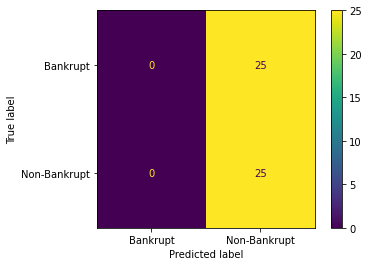

In [115]:
af = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_neural_2), 
                            display_labels=['Bankrupt', 'Non-Bankrupt'])
af.plot()

In [116]:
history_dict_neural_2 = history_neural_2.history

In [117]:
ply.line(history_dict_neural_2, title= 'Accuracy and Loss', labels= {'index':'Epochs'})


### Hyperparameter Tunning 

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
activation_fun = ['relu', 'sigmoid', 'tanh', 'selu', 'swish']
regularizer_fun = [tf.keras.regularizers.L1(), tf.keras.regularizers.L2()]

In [120]:
l = [0.01,0.1,1,1.5,]
dropout_rates = [0.1,0.2,0.3]
# epochs = [10,20]

In [121]:
param_neural = dict(activation_fun = activation_fun, regularizer_fun = regularizer_fun,
                   l = l, dropout_rates = dropout_rates, )

In [122]:
param_neural

{'activation_fun': ['relu', 'sigmoid', 'tanh', 'selu', 'swish'],
 'regularizer_fun': [<tensorflow.python.keras.regularizers.L1 at 0x1b8e9e30e50>,
 'l': [0.01, 0.1, 1, 1.5],
 'dropout_rates': [0.1, 0.2, 0.3]}

In [123]:
print('Total models get trained are: ')
param_neural

Total models get trained are: 


{'activation_fun': ['relu', 'sigmoid', 'tanh', 'selu', 'swish'],
 'regularizer_fun': [<tensorflow.python.keras.regularizers.L1 at 0x1b8e9e30e50>,
 'l': [0.01, 0.1, 1, 1.5],
 'dropout_rates': [0.1, 0.2, 0.3]}

In [124]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold

In [125]:
tf.random.set_seed(4)
def model_function_neural(activation_fun, regularizer_fun, l, dropout_rates, name_model):
    '''
    This function takes the parameter activation function, regularization fun,
    regularization parameter value, dropout rate and model name
    '''
    model = Sequential(name = name_model)
    model.add(Dense(6, input_dim = 6, activation = activation_fun, 
                    kernel_regularizer = tf.keras.regularizers.L2(l2= l)))
    model.add(Dropout(dropout_rates))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss = tf.keras.losses.BinaryCrossentropy(),
                 metrics= ['accuracy'])
    return model

In [126]:

grid_search_model_neural = KerasClassifier(build_fn=model_function_neural,
                                           epochs= 20, verbose = 0)

In [127]:
grid_search_neural = GridSearchCV(estimator= grid_search_model_neural, 
                                  param_grid=param_neural, cv = KFold(), )

In [128]:
# grid_result = grid_search_neural.fit(X_train, y_train)

In [129]:
# grid_result.best_params_, grid_result.best_score_

### Neural network 3 

In [130]:
tf.random.set_seed(4)

neural_model_3 = model_function_neural('relu', tf.keras.regularizers.L2(), 0.01, 0.1, 'neural_model_3')
history_neural_3 = neural_model_3.fit(X_train, y_train, epochs = 60, validation_data= (X_test, y_test))
print('MODEL TRAINING IS COMPLETE')

Epoch 1/60
7/7 [==============================] - 1s 39ms/step - loss: 0.8319 - accuracy: 0.5950 - val_loss: 0.8928 - val_accuracy: 0.5000
Epoch 2/60
7/7 [==============================] - 0s 5ms/step - loss: 0.8128 - accuracy: 0.5850 - val_loss: 0.8770 - val_accuracy: 0.5000
Epoch 3/60
7/7 [==============================] - 0s 5ms/step - loss: 0.7927 - accuracy: 0.5950 - val_loss: 0.8617 - val_accuracy: 0.5000
Epoch 4/60
7/7 [==============================] - 0s 5ms/step - loss: 0.7863 - accuracy: 0.5850 - val_loss: 0.8474 - val_accuracy: 0.5000
Epoch 5/60
7/7 [==============================] - 0s 5ms/step - loss: 0.7604 - accuracy: 0.5950 - val_loss: 0.8330 - val_accuracy: 0.5000
Epoch 6/60
7/7 [==============================] - 0s 5ms/step - loss: 0.7508 - accuracy: 0.5750 - val_loss: 0.8191 - val_accuracy: 0.5000
Epoch 7/60
7/7 [==============================] - 0s 5ms/step - loss: 0.7520 - accuracy: 0.5800 - val_loss: 0.8059 - val_accuracy: 0.5000
Epoch 8/60
7/7 [=================

In [131]:
history_dict_neural_3 = history_neural_3.history

In [132]:
ply.line(history_dict_neural_3, labels = {'index':'Epochs'}, title= 'Accuracy and Loss')

In [133]:
neural_model_3.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.9600


[0.4382460415363312, 0.9599999785423279]

In [134]:
y_pred_neural_3 = tf.round(neural_model_3.predict(X_test))

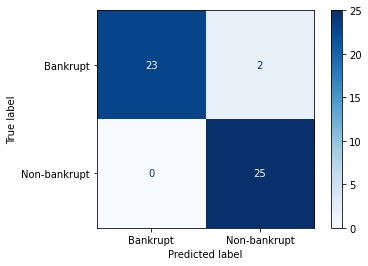

In [135]:
af=ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_neural_3), 
                display_labels= ['Bankrupt', 'Non-bankrupt'], )
af.plot(cmap = 'Blues')

In [136]:
'piyush'+str(time.strftime('-%d-%b-%Y-%H:%M:%S'))

'piyush-02-Dec-2021-15:57:53'

### Neural network 4 

Trained on balanced dataset

In [137]:
tf.random.set_seed(4)

neural_model_4 = model_function_neural('relu', tf.keras.regularizers.L2(), 
                                       0.01, 0.2, 'neural_model_4')
history_neural_4 = neural_model_4.fit(X_train_1, y_train_1, epochs = 60, 
                verbose=0, validation_data= (X_test_1, y_test_1))
print('MODEL TRAINING IS COMPLETE')

MODEL TRAINING IS COMPLETE


In [138]:
history_dict_neural_4 = history_neural_4.history

In [139]:
ply.line(history_dict_neural_4, labels = {'index':'Epochs'}, 
         title= 'Accuracy and Loss')

In [140]:
neural_model_4.evaluate(X_test_1,y_test_1)

2/2 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.9655


[0.40441590547561646, 0.9655172228813171]

In [141]:
y_pred_neural_4 = tf.round(neural_model_4.predict(X_test_1))

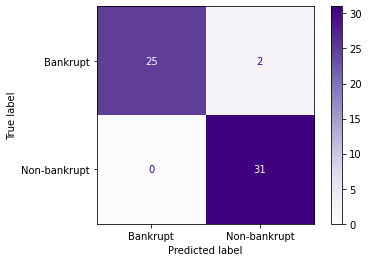

In [142]:
af=ConfusionMatrixDisplay(confusion_matrix(y_test_1, y_pred_neural_4), 
                          display_labels= ['Bankrupt', 'Non-bankrupt'])
af.plot(cmap = 'Purples')

In [143]:
neural_model_4.save_weights(PATH_MODEL)

In [144]:
# a = save_model_function(neural_model_4)

In [145]:
# a

In [146]:
# pickle.dump(neural_model_1, open('neural_model_pickle_file.pkl', 'wb'))

In [147]:
# neural_model_1.save('H:/Data Science/neural_1.h5', )

In [148]:
# load_model_neural = tf.keras.models.load_model(a)

In [149]:
# load_model_neural.evaluate(X_test, y_test)

## Logistic regression 

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, plot_roc_curve

###  Logistic model 1

In [151]:
logistic_model_1 = LogisticRegression(C = 0.001)
logistic_model_1.fit(X_train, y_train)

LogisticRegression(C=0.001)

In [152]:
logistic_model_1.score(X_test, y_test)

0.5

In [153]:
logistic_model_1.score(X_train, y_train)

0.59

In [154]:
# pickle.dump(logistic_model_1, open('logistic_model_project.pkl', 'wb'))

In [155]:
# load_model_logistic = pickle.load(open('logistic_model_project.pkl', 'rb'))

In [156]:
y_pred = logistic_model_1.predict(X_test)

In [157]:
roc_auc_score(y_test, y_pred, )

0.5

In [158]:
roc_curve(y_test, y_pred,)

(array([0., 1.]), array([0., 1.]), array([2, 1], dtype=int64))

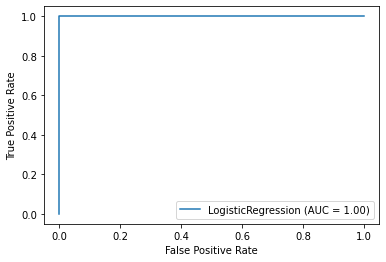

In [159]:
plot_roc_curve(logistic_model_1, X_test, y_test)

### Logistic model 2 

In [160]:
classifier = LogisticRegression(penalty='l2', C = 0.018)
logistic_model_2 = classifier.fit(X_train, y_train)

In [161]:
logistic_model_2.score(X_test, y_test)

0.96

In [162]:
logistic_model_2.score(X_train, y_train)

0.96

In [163]:
# Predict for x dataset
y_pred_train = classifier.predict(X_train)
y_pred_train

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [164]:
y_pred_train_df = pd.DataFrame({
    'actual': y_train,
    'predicted_prob': classifier.predict(X_train)
})
y_pred_train_df

actual  predicted_prob
213       1               1
194       1               1
153       1               1
122       1               1
4         0               0
217       1               1
175       1               1
65        0               0
34        0               0
25        0               0
125       1               1
245       1               1
67        0               0
168       1               1
140       1               1
82        0               0
10        0               0
197       1               1
12        0               0
163       1               1
225       1               1
103       0               0
47        0               0
89        0               0
206       1               1
41        0               0
63        0               0
145       1               1
128       1               1
242       1               1
114       1               1
201       1               1
199       1               1
205       1               1
51        0               0
182       1               1
151       1               1
87        0               0
231       1               1
222       1               1
154       1               1
86        0               0
220       1               1
108       1               1
17        0               0
30        0               0
111       1               1
135       1               1
126       1               1
219       1               1
118       1               1
72        0               1
42        0               0
162       1               1
132       1               1
71        0               0
143       1               1
13        0               0
133       1               1
180       1               1
227       1               1
212       1               1
105       0               0
95        0               1
84        0               0
5         0               0
247       1               1
50        0               0
228       1               1
211       1               1
100       0               0
229       1               1
146       1               1
78        0               0
24        0               0
198       1               1
241       1               1
8         0               0
240       1               1
53        0               1
27        0               0
221       1               1
92        0               0
32        0               0
22        0               0
210       1               1
164       1               1
173       1               1
183       1               1
239       1               1
35        0               1
120       1               1
19        0               0
186       1               1
44        0               0
68        0               0
76        0               0
112       1               1
238       1               1
11        0               0
55        0               0
235       1               1
9         0               0
29        0               0
39        0               0
216       1               1
56        0               0
188       1               1
243       1               1
91        0               0
59        0               0
226       1               1
36        0               1
156       1               1
223       1               1
52        0               0
185       1               1
48        0               1
158       1               1
187       1               1
141       1               1
96        0               0
75        0               0
193       1               1
177       1               1
160       1               1
80        0               0
144       1               1
99        0               0
124       1               1
196       1               1
117       1               1
85        0               0
1         0               0
113       1               1
207       1               1
174       1               1
190       1               1
189       1               1
246       1               1
165       1               1
116       1               1
1

In [165]:
confusion_matrix(y_train, y_pred_train)

array([[ 74,   8],
       [  0, 118]], dtype=int64)

In [166]:
# Accuracy
(74 + 118) / (74 + 8 + 118) * 100

96.0

In [167]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        82
           1       0.94      1.00      0.97       118

    accuracy                           0.96       200
   macro avg       0.97      0.95      0.96       200
weighted avg       0.96      0.96      0.96       200



Text(0, 0.5, 'True Positive Rate')

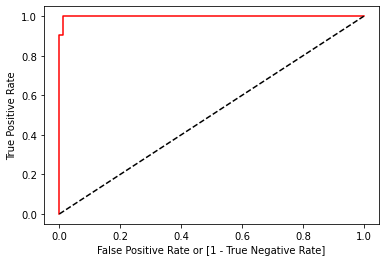

In [168]:
# ROC curves
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(
    y_train, classifier.predict_proba(X_train)[:, 1])

auc = roc_auc_score(y_train, y_pred_train)


plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [169]:
y_pred_test = logistic_model_2.predict(X_test)
y_pred_test

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0], dtype=int64)

In [170]:
confusion_matrix(y_test,y_pred_test)

array([[23,  2],
       [ 0, 25]], dtype=int64)

In [171]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.93      1.00      0.96        25

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



Text(0, 0.5, 'True Positive Rate')

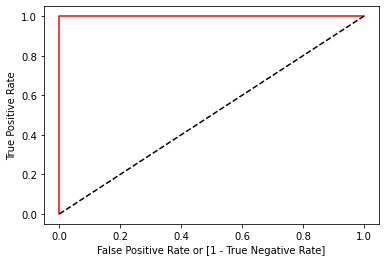

In [172]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(
    y_test, classifier.predict_proba(X_test)[:, 1])

auc = roc_auc_score(y_test, y_pred_test)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

## Decision Tree

In [173]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [174]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_CART.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [175]:
# Predicting Data
preds = model_CART.predict(X_test)
pd.Series(preds).value_counts()

0    25
1    25
dtype: int64

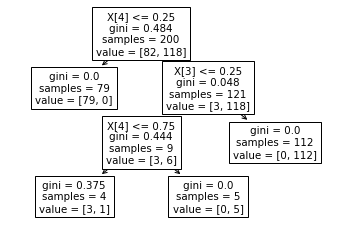

In [176]:
# Plotting Decision tree
tree.plot_tree(model_CART);

In [177]:
# Checking accuracy of model
model_CART.score(X_test, y_test)

1.0

## Catboost 

In [178]:
from catboost import CatBoostClassifier, Pool

In [179]:
pool_1 = Pool(X_train, y_train, feature_names= colm[:6])

### Catboost 1

In [180]:
catboost_model_1 = CatBoostClassifier(iterations= 10, depth=2, 
            learning_rate = 0.01, loss_function= 'Logloss', verbose= True)

catboost_model_1.fit(pool_1)

0:	learn: 0.6847886	total: 360ms	remaining: 3.24s
1:	learn: 0.6773352	total: 361ms	remaining: 1.44s
2:	learn: 0.6699075	total: 361ms	remaining: 843ms
3:	learn: 0.6621452	total: 362ms	remaining: 543ms
4:	learn: 0.6549419	total: 362ms	remaining: 362ms
5:	learn: 0.6477055	total: 363ms	remaining: 242ms
6:	learn: 0.6407527	total: 363ms	remaining: 156ms
7:	learn: 0.6338876	total: 364ms	remaining: 90.9ms
8:	learn: 0.6265364	total: 364ms	remaining: 40.4ms
9:	learn: 0.6194772	total: 364ms	remaining: 0us


In [181]:
catboost_model_1.score(X_train, y_train)

0.985

In [182]:
catboost_model_1.score(X_test, y_test)

0.98

In [183]:
catboost_model_1.tree_count_, catboost_model_1.feature_importances_

(10,
 array([ 0.        ,  0.44259918,  0.        ,  1.30199114, 98.07886442,
         0.17654526]))

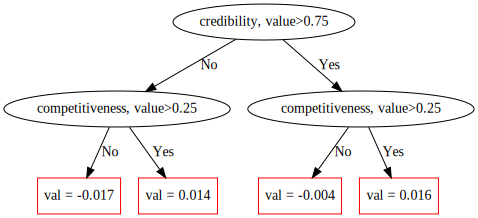

In [184]:
catboost_model_1.plot_tree(tree_idx = 5, pool=pool_1)

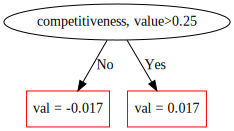

In [185]:
catboost_model_1.plot_tree(tree_idx= 0, pool= pool_1)

### Parameters for Tunning 

There are various parameter for Tunning in Catboost.

1. Number of trees (iteration)
2. Learning rate
3. Tree depth.
4. L2 regularization.
5. Random strength: The amount of randomness to use for scoring splits. use this to avoid overfitting.
6. Bagging Temperature: Defines the setting of Bayesian bootstrap. Higher the value more aggressive the bagging.
7. Border count: GPU term
8. Internal dataset order.
9. Tree growing policy: Default it is symmetric tree. set it using **grow_policy** and to Depthwise.

### CatBoost 2

In [186]:
pool_1 = Pool(X_train, y_train, feature_names= colm[:6])

In [187]:
catboost_model_1 = CatBoostClassifier(iterations= 2, depth=1, 
                            learning_rate = 0.01,
                    loss_function= 'Logloss', verbose= True)

catboost_model_1.fit(pool_1)

0:	learn: 0.6847886	total: 416us	remaining: 416us
1:	learn: 0.6765714	total: 687us	remaining: 0us


In [188]:
catboost_model_1.score(X_train, y_train)

0.985

In [189]:
catboost_model_1.score(X_test, y_test)

0.98

In [190]:
catboost_model_1.tree_count_, catboost_model_1.feature_importances_

(2, array([  0.,   0.,   0.,   0., 100.,   0.]))

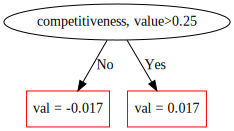

In [191]:
catboost_model_1.plot_tree(tree_idx = 1, pool=pool_1)

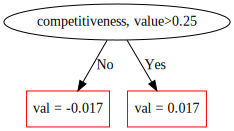

In [192]:
catboost_model_1.plot_tree(tree_idx= 0, pool= pool_1)

## XGBoost

In [193]:
from xgboost import XGBClassifier
import xgboost as xgb

### XGBoost 1

In [194]:
xgboost_model_1 = XGBClassifier(use_label_encoder=False)
xgboost_model_1.fit(X_train, y_train, eval_metric = 'logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [195]:
xgboost_model_1.score(X_test, y_test)

1.0

In [196]:
print(classification_report(y_test, xgboost_model_1.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

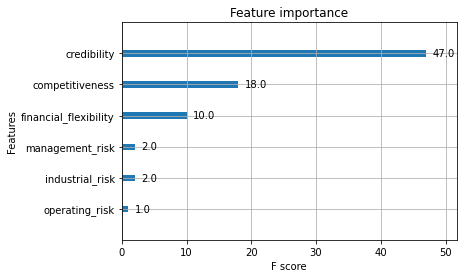

In [197]:
xgb.plot_importance(xgboost_model_1)

<AxesSubplot:>

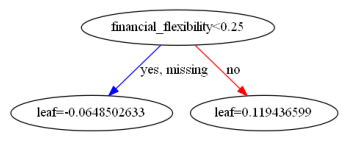

In [198]:
xgb.plot_tree(xgboost_model_1, num_trees= 20) 

### XGBoost 2

In [199]:
xgboost_model_2 = XGBClassifier(n_estimators = 3, max_depth = 1, 
                    reg_lambda = 0.0001, use_label_encoder= False)

In [200]:
xgboost_model_2.fit(X_train, y_train, eval_metric= 'logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=3, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.0001, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [201]:
xgboost_model_2.score(X_train, y_train)

0.985

In [202]:
xgboost_model_2.feature_importances_

array([0., 0., 0., 0., 1., 0.], dtype=float32)

In [203]:
xgboost_model_2.save_model(fname = PATH_MODEL+'xgboost_model_2.json', )

In [204]:
pickle.dump(xgboost_model_2 , open(PATH_MODEL+'xgboost_model_2.pkl', 'wb'))

In [205]:
xgboost_model_2.score(X_test, y_test)

0.98

In [206]:
confusion_matrix(y_test, xgboost_model_2.predict(X_test))

array([[24,  1],
       [ 0, 25]], dtype=int64)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

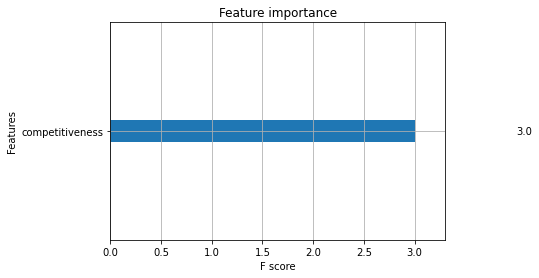

In [207]:
xgb.plot_importance(xgboost_model_2)

## LGBoost 



we have various parameters to adjust in LGBoost. These parameters my be for overfitting, for speeding, for accuracy like:
- num_leaves
- min_data_in_leaf
- max_depth

**For Fast speed:**
- **Grow Shallow tree.**
1. Decrease max_depth.
2. Decrease leaves.
3. Increase min_gain_to_leaf.
4. Increase min_data_in_leaf.

- **Grow less trees:**
1. Decrease num_iterations.
2. Use early-stopping.
3. few split.
4. Decrease max_bin.
5. Decrease feature_fraction.

- **Use less data**
1. Bagging: it is same process like random_forest. subsetting the data without replacement or with replacement.


**FOR BETTER ACCURACY**
1. Use large max_bin (makes process slow).
2. small learning rate with large num-iteration.
3. Use large num_leaves.
4. Bigger data.
5. Try DART.

**DEALING WITH UNDERFITTING**
1. Use small bins 'max_bin'
2. use small 'num_leaves'
3. use 'min_data_in_leaf'
4. Use bagging by set 'bagging_fraction'
5. feature sub-sampling by set 'feature_fraction'
6. try regularization 'lambda_l1' or 'L2' and min_gain_to_split
7. max_depth
8. extra_trees
9. path_smooth

In [208]:
import lightgbm as lgb

### LGBM 1 

In [209]:
lgbm_model_1 = lgb.LGBMClassifier()
lgbm_model_1.fit(X_train, y_train)

LGBMClassifier()

In [210]:
lgbm_model_1.score(X_test, y_test)

1.0

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

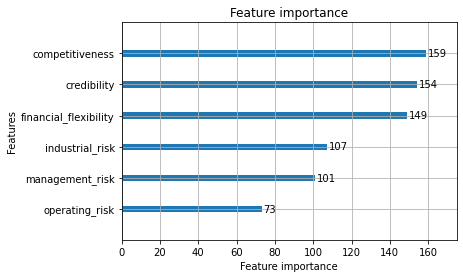

In [211]:
lgb.plot_importance(lgbm_model_1)

<AxesSubplot:>

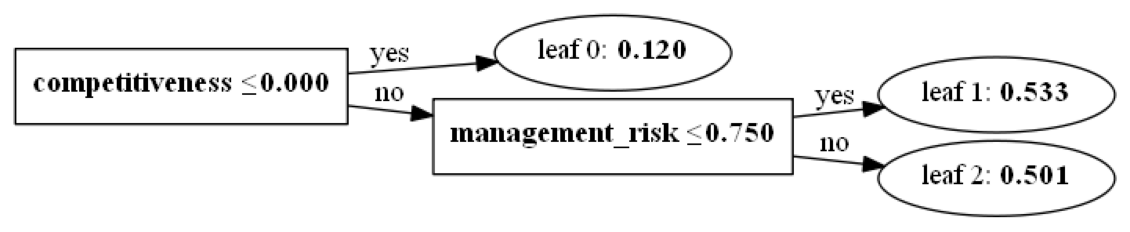

In [212]:
lgb.plot_tree(lgbm_model_1, figsize=(20,20), )

In [213]:
for feature in colm:
    if feature == 'competitiveness':
        pass

### LGBM 2

In [214]:
lgbm_model_2 = lgb.LGBMClassifier(num_leaves= 10, max_depth= 5, learning_rate= 0.01,
                n_estimators= 10, min_split_gain= 0, reg_alpha= 0)

In [215]:
lgbm_model_2.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.01, max_depth=5, min_split_gain=0,
               n_estimators=10, num_leaves=10, reg_alpha=0)

<AxesSubplot:>

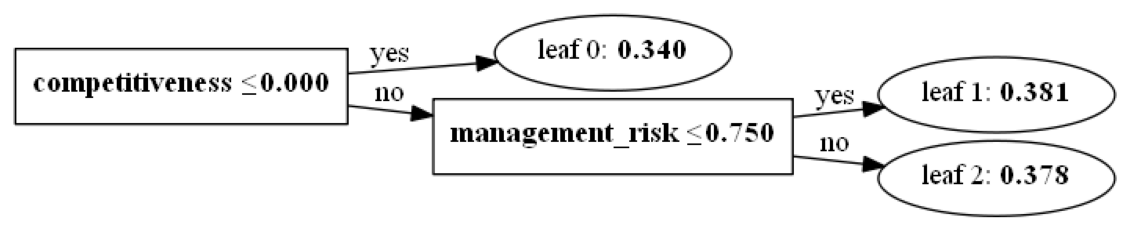

In [216]:
lgb.plot_tree(lgbm_model_2, figsize=(20,20))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

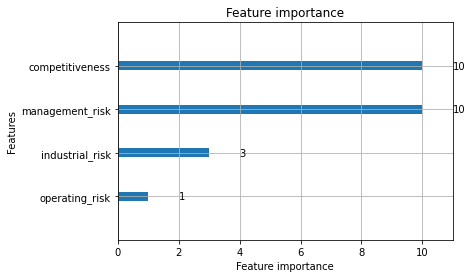

In [217]:
lgb.plot_importance(lgbm_model_2)

In [218]:
lgbm_model_2.score(X_test, y_test)

0.5

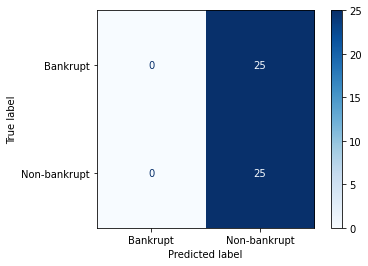

In [219]:
plot_confusion_metric(lgbm_model_2, X_test, y_test)

### LGBM 3 

In [220]:
lgbm_model_3 = lgb.LGBMClassifier(num_leaves= 10, max_depth= 3, 
            learning_rate= 0.1, n_estimators= 2, min_split_gain= 0, 
                                  reg_alpha= 0)

In [221]:
lgbm_model_3.fit(X_train_cat, y_train_cat)

LGBMClassifier(max_depth=3, min_split_gain=0, n_estimators=2, num_leaves=10,
               reg_alpha=0)

<AxesSubplot:>

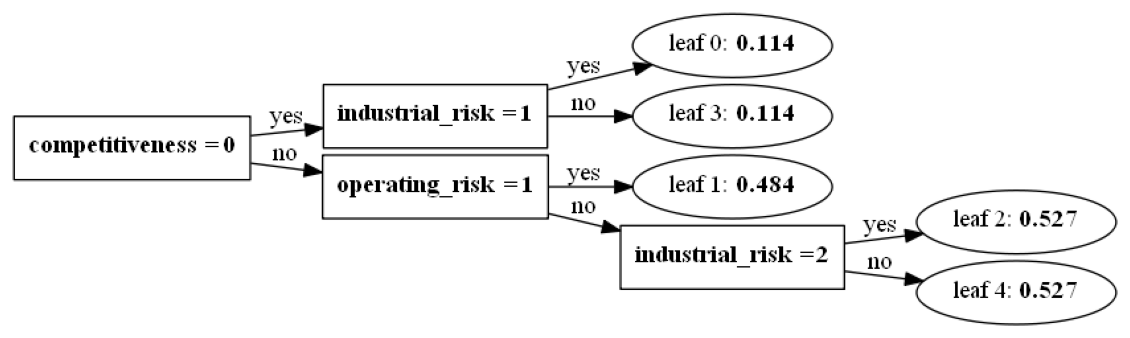

In [222]:
lgb.plot_tree(lgbm_model_3, figsize=(20,20))

In [223]:
lgbm_model_3.score(X_test_cat, y_test_cat)

0.9841269841269841

In [224]:
lgbm_model_3.predict([[1,0,0,0,0.5,0.5]])

array(['bankruptcy'], dtype=object)

In [225]:
colm

['industrial_risk',
 'management_risk',
 'financial_flexibility',
 'credibility',
 'competitiveness',
 'operating_risk',
 'class']

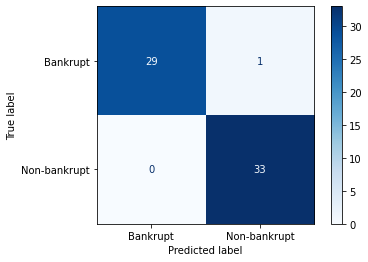

In [226]:
plot_confusion_metric(lgbm_model_3, X_test_cat, y_test_cat)

## AdaBoost

In [227]:
from sklearn.ensemble import AdaBoostClassifier

### Adaboost 1

In [228]:
adaboost_model_1 = AdaBoostClassifier()
adaboost_model_1.fit(X_train, y_train)

AdaBoostClassifier()

In [229]:
adaboost_model_1.score(X_test, y_test)

1.0

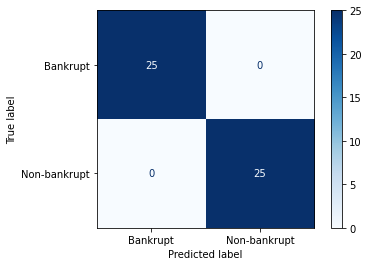

In [230]:
plot_confusion_metric(adaboost_model_1, X_test, y_test)

## Naive-bayesian models 

There are various type of naive-bayes methods. like:
1. Gaussian Naive bayes.
2. Multinomial Naive bayes.
3. Complement Naive bayes.
4. Bernoulli Naive bayes.
5. Categorical Naive bayes.

- **Gaussian Naive Bayes:** It implements the Gaussian Naive Bayes algorithm for classification. There are two parameters **priors (prior probabilities) and var_smoothing**


- **Multinomial Naive Bayes:** It implements the naive bayes algorithm for multinomially distributed data. There is a alpha parameter where if it is equal to one it is called **Laplace Smoothing** while less than it is **Lidstone Smoothing** and it works with occurrence counts.


- **Complement Naive Bayes:** It implement complemet naive bayes where CNB is adaptation of standard Multinomial Naive Bayes algorithm that is particularly suited for imbalanced dataset. there is also same smoothing hyperparameter as MNB **alpha**



- **Bernoulli Naive Bayes:** It implements the naive bayes training and classification algorithms for data that is distributed acording to multivariate bernoulli distribution. it works with binary or boolean features. There are four parameters **alpha, binarize, fit_prior and class_prior**


But The tunnig the parameters may or maynot be help to we use other methods like: 


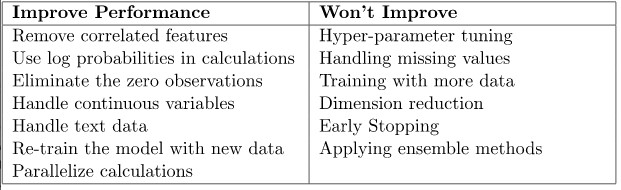

In [231]:
from sklearn import naive_bayes as nb

### First models

In [232]:
gaussianNB_model_1 = nb.GaussianNB()
gaussianNB_model_1.fit(X_train, y_train)

GaussianNB()

In [233]:
multinomialNB_model_1 = nb.MultinomialNB()
multinomialNB_model_1.fit(X_train, y_train)

MultinomialNB()

In [234]:
complementNB_model_1 = nb.ComplementNB()
complementNB_model_1.fit(X_train, y_train)

ComplementNB()

In [235]:
bernoulliNB_model_1 = nb.BernoulliNB()
bernoulliNB_model_1.fit(X_train, y_train)

BernoulliNB()

In [236]:
gaussianNB_model_1.score(X_test, y_test)

0.98

In [237]:
multinomialNB_model_1.score(X_test, y_test)

0.98

In [238]:
complementNB_model_1.score(X_test, y_test)

0.98

In [239]:
bernoulliNB_model_1.score(X_test, y_test)

1.0

In [240]:
gaussianNB_model_1.get_params(deep=True)

{'priors': None, 'var_smoothing': 1e-09}

In [241]:
gaussianNB_model_1.n_features_in_

6

In [242]:
gaussianNB_model_1.classes_

array([0, 1], dtype=int64)

### Tunning the parameter

In [243]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.naive_bayes import CategoricalNB as CB
from sklearn.model_selection import train_test_split
from sklearn import neighbors, metrics, naive_bayes

In [244]:
classifier_gb = GB()
classifier_gb.fit(X_train, y_train) 
# we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(X_train)
accuracy_train_g = np.mean(train_pred_g==y_train)

In [245]:
test_pred_g = classifier_gb.predict(X_test)
accuracy_test_g = np.mean(test_pred_g==y_test)

### Multinomial Naive Bayes

In [246]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns =
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(10)

alpha  Train Accuracy  Test Accuracy  Test Recall  Test Precision
0  0.00001           0.975           0.98          1.0        0.961538
1  0.11001           0.975           0.98          1.0        0.961538
2  0.22001           0.975           0.98          1.0        0.961538
3  0.33001           0.975           0.98          1.0        0.961538
4  0.44001           0.975           0.98          1.0        0.961538
5  0.55001           0.975           0.98          1.0        0.961538
6  0.66001           0.975           0.98          1.0        0.961538
7  0.77001           0.975           0.98          1.0        0.961538
8  0.88001           0.975           0.98          1.0        0.961538
9  0.99001           0.975           0.98          1.0        0.961538

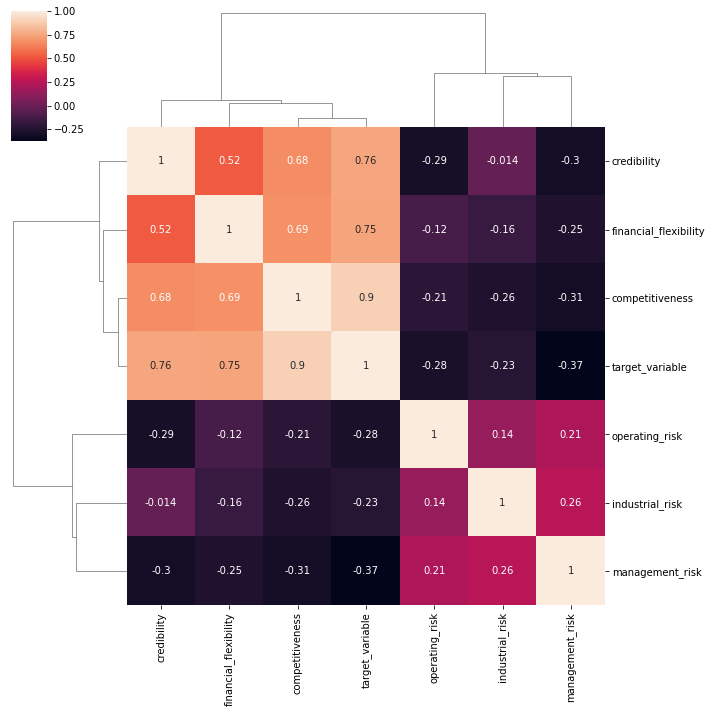

In [247]:
# calculate the correlations
correlations = bank_final.corr()
# plot the clustermap 
sn.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

In [248]:
"""
The highly correlated features are counted twice in the model. Double counting leads to 
overestimating the importance of those features. So, the performance of the Naive Bayes classifier degrades.
We need to eliminate highly correlated features
here we have excluded the competitiveness and financial_flexibility column.
"""

data1=bank_final.iloc[:,[0,1,3,5,6]]
data1

industrial_risk  management_risk  credibility  operating_risk  \
0                0.5              1.0          0.0             0.5   
1                0.0              1.0          0.0             1.0   
2                1.0              0.0          0.0             1.0   
3                0.5              0.0          0.5             1.0   
4                1.0              1.0          0.0             1.0   
5                1.0              1.0          0.5             0.5   
6                1.0              1.0          0.0             0.0   
7                1.0              1.0          0.0             0.5   
8                1.0              1.0          0.5             0.0   
9                1.0              1.0          0.5             1.0   
10               1.0              1.0          0.0             1.0   
11               0.0              1.0          0.0             1.0   
12               0.5              1.0          0.0             1.0   
13               1.0              1.0          0.0             1.0   
14               0.0              1.0          0.0             0.5   
15               0.5              1.0          0.0             0.5   
16               0.5              1.0          0.0             0.5   
17               0.5              0.5          0.0             0.0   
18               0.5              1.0          0.0             1.0   
19               0.0              0.5          0.0             0.5   
20               0.0              1.0          0.0             0.0   
21               0.0              0.5          0.0             1.0   
22               0.0              1.0          0.0             1.0   
23               1.0              0.5          0.0             0.0   
24               1.0              1.0          0.0             0.5   
25               0.5              0.5          0.0             1.0   
26               0.5              0.5          0.0             1.0   
27               0.0              0.0          0.0             1.0   
28               0.5              0.0          0.0             1.0   
29               0.0              0.5          0.0             1.0   
30               0.5              1.0          0.0             1.0   
31               1.0              1.0          0.0             1.0   
32               1.0              0.5          0.0             1.0   
33               0.0              1.0          0.0             1.0   
34               1.0              0.0          0.0             1.0   
35               0.5              0.0          0.5             1.0   
36               1.0              1.0          1.0             0.0   
37               1.0              1.0          0.0             1.0   
38               1.0              1.0          0.5             0.5   
39               1.0              1.0          1.0             1.0   
40               1.0              1.0          0.0             0.0   
41               1.0              1.0          0.0             0.5   
42               1.0              1.0          0.5             0.0   
43               1.0              1.0          0.5             1.0   
44               1.0              1.0          0.0             1.0   
45               0.0              1.0          0.0             1.0   
46               0.5              1.0          0.0             1.0   
47               1.0              1.0          0.0             1.0   
48               0.0              1.0          0.0             0.5   
49               0.0              1.0          0.0             0.5   
50               0.5              1.0          0.0             0.5   
51               1.0              1.0          0.0             0.5   
52               1.0              0.0          0.0             1.0   
53               0.5              0.0          0.5             1.0   
54               1.0              1.0          0.0             1.0   
55               1.0              1.0          0.5             0.5   
56             

In [249]:
x2=data1.iloc[:,0:-1]
y2=data1.iloc[:,-1]

In [250]:
# Splitting data into training and testing data set
x2_train, x2_test,y2_train,y2_test = train_test_split(x2,y2, test_size=0.2,random_state=1)

### Multinomial Naive Bayes

In [251]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(x2_train, y2_train)
    score_train[count] = bayes.score(x2_train, y2_train)
    score_test[count]= bayes.score(x2_test, y2_test)
    recall_test[count] = metrics.recall_score(y2_test, bayes.predict(x2_test))
    precision_test[count] = metrics.precision_score(y2_test, bayes.predict(x2_test))
    count = count + 1
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns =
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models


alpha  Train Accuracy  Test Accuracy  Test Recall  Test Precision
0     0.00001           0.895           0.88          1.0        0.812500
1     0.11001           0.895           0.88          1.0        0.812500
2     0.22001           0.895           0.88          1.0        0.812500
3     0.33001           0.895           0.88          1.0        0.812500
4     0.44001           0.895           0.88          1.0        0.812500
5     0.55001           0.895           0.88          1.0        0.812500
6     0.66001           0.895           0.88          1.0        0.812500
7     0.77001           0.895           0.88          1.0        0.812500
8     0.88001           0.895           0.88          1.0        0.812500
9     0.99001           0.895           0.88          1.0        0.812500
10    1.10001           0.895           0.88          1.0        0.812500
11    1.21001           0.895           0.88          1.0        0.812500
12    1.32001           0.895           0.88          1.0        0.812500
13    1.43001           0.895           0.88          1.0        0.812500
14    1.54001           0.895           0.88          1.0        0.812500
15    1.65001           0.895           0.88          1.0        0.812500
16    1.76001           0.895           0.88          1.0        0.812500
17    1.87001           0.895           0.88          1.0        0.812500
18    1.98001           0.895           0.88          1.0        0.812500
19    2.09001           0.895           0.88          1.0        0.812500
20    2.20001           0.895           0.88          1.0        0.812500
21    2.31001           0.895           0.88          1.0        0.812500
22    2.42001           0.895           0.88          1.0        0.812500
23    2.53001           0.895           0.88          1.0        0.812500
24    2.64001           0.895           0.88          1.0        0.812500
25    2.75001           0.895           0.88          1.0        0.812500
26    2.86001           0.895           0.88          1.0        0.812500
27    2.97001           0.895           0.88          1.0        0.812500
28    3.08001           0.895           0.88          1.0        0.812500
29    3.19001           0.895           0.88          1.0        0.812500
30    3.30001           0.895           0.88          1.0        0.812500
31    3.41001           0.895           0.88          1.0        0.812500
32    3.52001           0.895           0.88          1.0        0.812500
33    3.63001           0.895           0.88          1.0        0.812500
34    3.74001           0.895           0.88          1.0        0.812500
35    3.85001           0.895           0.88          1.0        0.812500
36    3.96001           0.895           0.88          1.0        0.812500
37    4.07001           0.895           0.88          1.0        0.812500
38    4.18001           0.895           0.88          1.0        0.812500
39    4.29001           0.895           0.88          1.0        0.812500
40    4.40001           0.895           0.88          1.0        0.812500
41    4.51001           0.895           0.88          1.0        0.812500
42    4.62001           0.895           0.88          1.0        0.812500
43    4.73001           0.895           0.88          1.0        0.812500
44    4.84001           0.895           0.88          1.0        0.812500
45    4.95001           0.895           0.88          1.0        0.812500
46    5.06001           0.895           0.88          1.0        0.812500
47    5.17001           0.890           0.86          1.0        0.787879
48    5.28001           0.890           0.86          1.0        0.787879
49    5.39001           0.890           0.86          1.0        0.787879
50    5.50001           0.890           0.86          1.0        0.787879
51    5.61001           0.890           0.86          1.0        0.787879
52    5.72001           0.890           0.86          1.0        0.787879
53    5.8300

### Bernoulli Naive Bayes

In [252]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.BernoulliNB(alpha=alpha)
    bayes.fit(x2_train, y2_train)
    score_train[count] = bayes.score(x2_train, y2_train)
    score_test[count]= bayes.score(x2_test, y2_test)
    recall_test[count] = metrics.recall_score(y2_test, bayes.predict(x2_test))
    precision_test[count] = metrics.precision_score(y2_test, bayes.predict(x2_test))
    count = count + 1
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns =
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models


alpha  Train Accuracy  Test Accuracy  Test Recall  Test Precision
0     0.00001            0.89            0.9          1.0         0.83871
1     0.11001            0.89            0.9          1.0         0.83871
2     0.22001            0.89            0.9          1.0         0.83871
3     0.33001            0.89            0.9          1.0         0.83871
4     0.44001            0.89            0.9          1.0         0.83871
5     0.55001            0.89            0.9          1.0         0.83871
6     0.66001            0.89            0.9          1.0         0.83871
7     0.77001            0.89            0.9          1.0         0.83871
8     0.88001            0.89            0.9          1.0         0.83871
9     0.99001            0.89            0.9          1.0         0.83871
10    1.10001            0.89            0.9          1.0         0.83871
11    1.21001            0.89            0.9          1.0         0.83871
12    1.32001            0.89            0.9          1.0         0.83871
13    1.43001            0.89            0.9          1.0         0.83871
14    1.54001            0.89            0.9          1.0         0.83871
15    1.65001            0.89            0.9          1.0         0.83871
16    1.76001            0.89            0.9          1.0         0.83871
17    1.87001            0.89            0.9          1.0         0.83871
18    1.98001            0.89            0.9          1.0         0.83871
19    2.09001            0.89            0.9          1.0         0.83871
20    2.20001            0.89            0.9          1.0         0.83871
21    2.31001            0.89            0.9          1.0         0.83871
22    2.42001            0.89            0.9          1.0         0.83871
23    2.53001            0.89            0.9          1.0         0.83871
24    2.64001            0.89            0.9          1.0         0.83871
25    2.75001            0.89            0.9          1.0         0.83871
26    2.86001            0.89            0.9          1.0         0.83871
27    2.97001            0.89            0.9          1.0         0.83871
28    3.08001            0.89            0.9          1.0         0.83871
29    3.19001            0.89            0.9          1.0         0.83871
30    3.30001            0.89            0.9          1.0         0.83871
31    3.41001            0.89            0.9          1.0         0.83871
32    3.52001            0.89            0.9          1.0         0.83871
33    3.63001            0.89            0.9          1.0         0.83871
34    3.74001            0.89            0.9          1.0         0.83871
35    3.85001            0.89            0.9          1.0         0.83871
36    3.96001            0.89            0.9          1.0         0.83871
37    4.07001            0.89            0.9          1.0         0.83871
38    4.18001            0.89            0.9          1.0         0.83871
39    4.29001            0.89            0.9          1.0         0.83871
40    4.40001            0.89            0.9          1.0         0.83871
41    4.51001            0.89            0.9          1.0         0.83871
42    4.62001            0.89            0.9          1.0         0.83871
43    4.73001            0.89            0.9          1.0         0.83871
44    4.84001            0.89            0.9          1.0         0.83871
45    4.95001            0.89            0.9          1.0         0.83871
46    5.06001            0.89            0.9          1.0         0.83871
47    5.17001            0.89            0.9          1.0         0.83871
48    5.28001            0.89            0.9          1.0         0.83871
49    5.39001            0.89            0.9          1.0         0.83871
50    5.50001            0.89            0.9          1.0         0.83871
51    5.61001            0.89            0.9          1.0         0.83871
52    5.72001            0.89            0.9          1.0         0.83871
53    5.8300

### Categorical Naive Bayes

In [253]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.CategoricalNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns =
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(10)


alpha  Train Accuracy  Test Accuracy  Test Recall  Test Precision
0  0.00001            0.91           0.86         0.72             1.0
1  0.11001            0.91           0.86         0.72             1.0
2  0.22001            0.91           0.86         0.72             1.0
3  0.33001            0.91           0.86         0.72             1.0
4  0.44001            0.91           0.86         0.72             1.0
5  0.55001            0.91           0.86         0.72             1.0
6  0.66001            0.91           0.86         0.72             1.0
7  0.77001            0.91           0.86         0.72             1.0
8  0.88001            0.91           0.86         0.72             1.0
9  0.99001            0.91           0.86         0.72             1.0

In [254]:
classifier_cnb = CB(alpha=0.00001)
model1=classifier_cnb.fit(X_train,y_train)
train_pred_cnb = model1.predict(X_train)
accuracy_train_cnb = np.mean(train_pred_cnb==y_train)
test_pred_cnb = model1.predict(X_test)
accuracy_test_cnb = np.mean(test_pred_cnb==y_test)
print('Training accuracy is:',accuracy_train_cnb,'\n','Testing accuracy is:',accuracy_test_cnb)

Training accuracy is: 0.91 
 Testing accuracy is: 0.86


In [255]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pred_cnb)

array([[25,  0],
       [ 7, 18]], dtype=int64)

<AxesSubplot:>

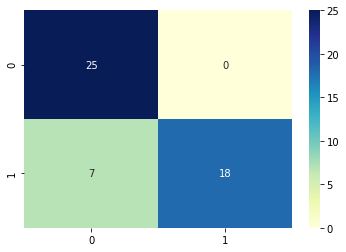

In [256]:
cm=confusion_matrix(y_test, test_pred_cnb)
cm_matrix=pd.DataFrame(data=cm)
sn.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [257]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,test_pred_cnb,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.72      0.84        25
           0       0.78      1.00      0.88        25

    accuracy                           0.86        50
   macro avg       0.89      0.86      0.86        50
weighted avg       0.89      0.86      0.86        50



## KNN 

In [258]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### K-nearest neighbor classifier 1

In [259]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [260]:
pred = knn.predict(X_test)

In [261]:
print(confusion_matrix(y_test,pred))

[[25  0]
 [ 0 25]]


In [262]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



### Choosing K-value 

In [263]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,bank_final,bank_final['target_variable'],cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Error Rate')

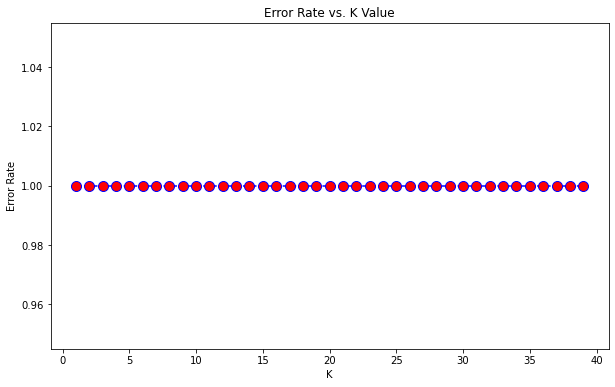

In [264]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## SVM

In [265]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Support Vector Machine - Classifier 1

In [266]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[1000,100,50,5,10,0.5],'C':[500,50,15,14,13,12,11,10,0.1,0.001] }]
model = GridSearchCV(clf,param_grid,cv=10)
model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [500, 50, 15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [1000, 100, 50, 5, 10, 0.5],
                          'kernel': ['rbf']}])

In [267]:
model.best_params_ , model.best_score_

({'C': 500, 'gamma': 0.5, 'kernel': 'rbf'}, 0.9949999999999999)

In [268]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
clf = SVC(C= 500, gamma = 0.5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 100.0


array([[25,  0],
       [ 0, 25]], dtype=int64)

<AxesSubplot:>

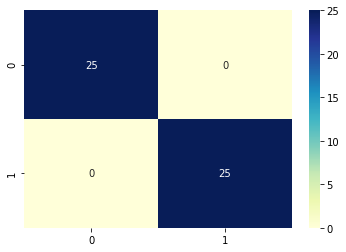

In [269]:
clf=confusion_matrix(y_test,y_pred)
clf_matrix=pd.DataFrame(data=clf)
sn.heatmap(clf_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [270]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



# Save and load the models

In [271]:
from tensorflow.keras.models import load_model

###  Neural Models

In [272]:
neural1 = save_model_function(neural_model_1, 'neural_model_1')

Tensorflow file
The model is saved as: H:/Excelr/Project/Bankruptcy project/Model_files/neural_model_1-02-Dec-2021-15_58_53.h5


In [273]:
neural1 = load_model(neural1)

In [274]:
neural1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 8.3520e-04 - accuracy: 1.0000


[0.0008352004806511104, 1.0]

In [275]:
neural4 = save_model_function(neural_model_4, 'neural_model_4')

Tensorflow file
The model is saved as: H:/Excelr/Project/Bankruptcy project/Model_files/neural_model_4-02-Dec-2021-15_58_54.h5


In [276]:
neural4 = load_model(neural4)

In [277]:
neural4.evaluate(X_test, y_test )

2/2 [==============================] - 0s 3ms/step - loss: 0.4097 - accuracy: 0.9600


[0.40967193245887756, 0.9599999785423279]

### Boosting methods

In [278]:
catboost1 = save_model_function(catboost_model_1, 'catboost_model_1')

Sklearn model
The model is saved as: H:/Excelr/Project/Bankruptcy project/Model_files/catboost_model_1-02-Dec-2021-15_58_55.pkl


In [279]:
catboost1 = load_pickel_model(catboost1, )

In [280]:
catboost1.score(X_test, y_test)

0.98

In [281]:
type(catboost1)

catboost.core.CatBoostClassifier